# Problem klasyfikacji

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('class_data.csv')

In [3]:
df.head()

,X_1,X_2,y
0,-0.141765,0.558236,1
1,1.197966,-0.303995,1
2,0.759391,0.110250,1
3,0.023315,-0.603563,1
4,-0.807980,0.548466,0


In [4]:
X = df[['X_1', 'X_2']].values
y = df['y'].values

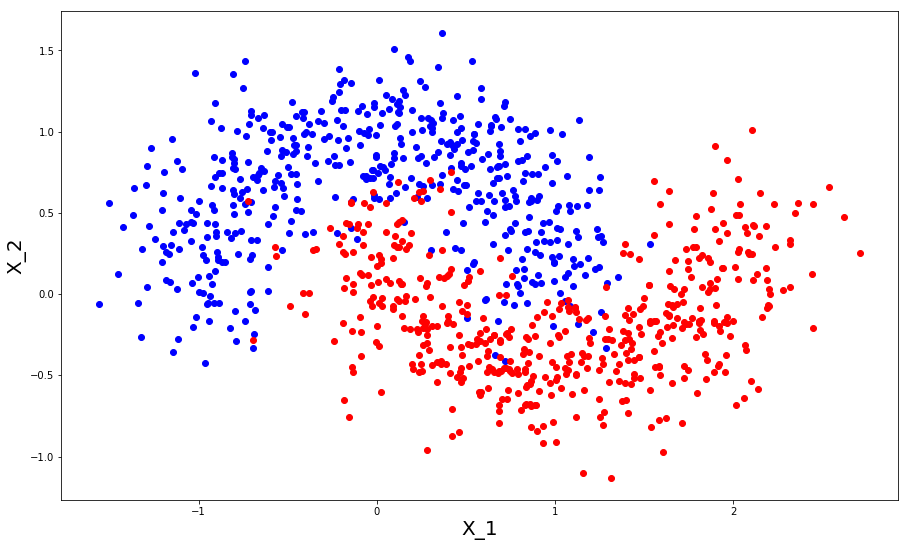

In [5]:
plt.figure(figsize=(15, 9))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
plt.xlabel("X_1", fontsize=20)
plt.ylabel("X_2", fontsize=20)
plt.show()

### Train-test split

In [6]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train

array([[ 0.34762729,  0.10615985],
       [ 0.00936197,  0.0746606 ],
       [ 0.25306266, -0.1673247 ],
       ...,
       [-0.90648072,  0.4344182 ],
       [ 1.18359782,  0.22383477],
       [ 1.94619678,  0.1584434 ]])

In [9]:
X_train.shape

(670, 2)

In [10]:
X_test.shape

(330, 2)

In [11]:
y_test.shape

(330,)

## K-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
import helpers as hlp

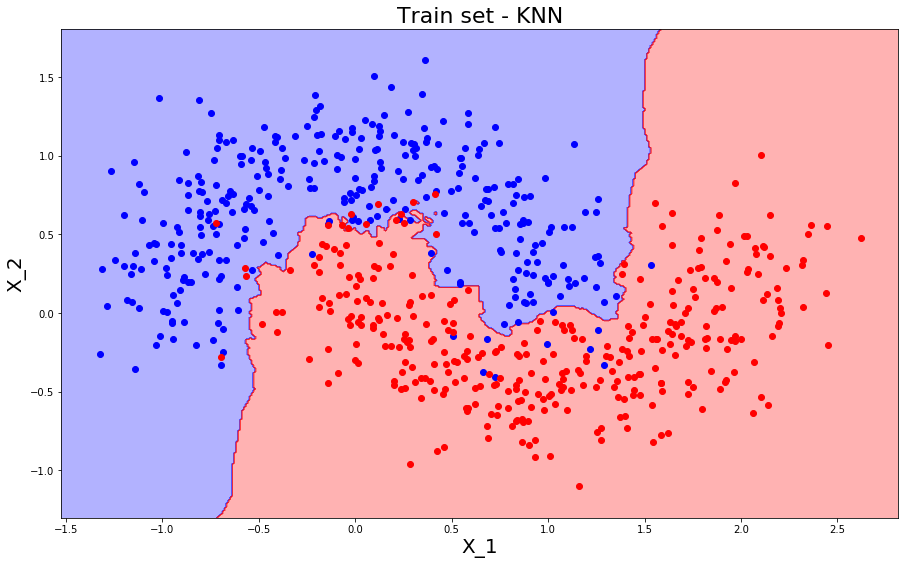

In [16]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_knn, title='Train set - KNN')

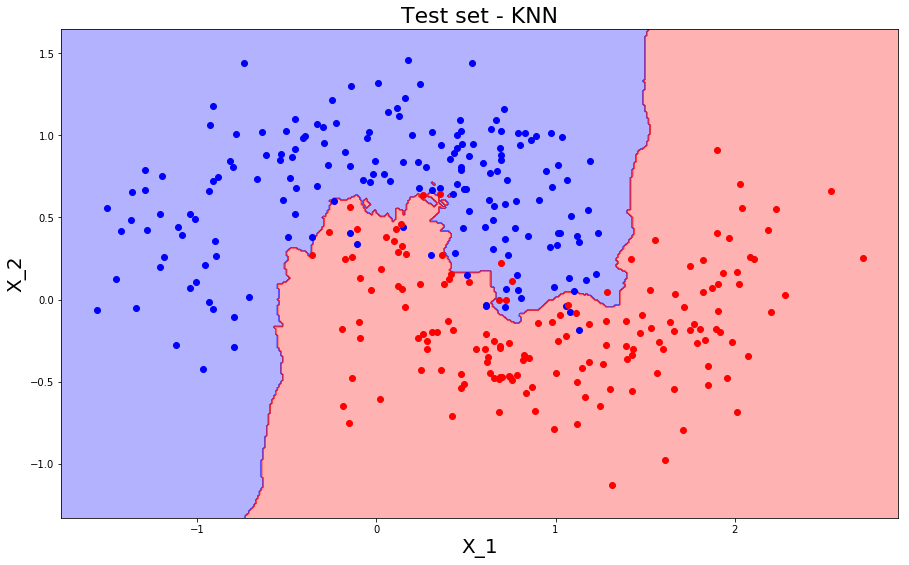

In [17]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_knn, title='Test set - KNN')

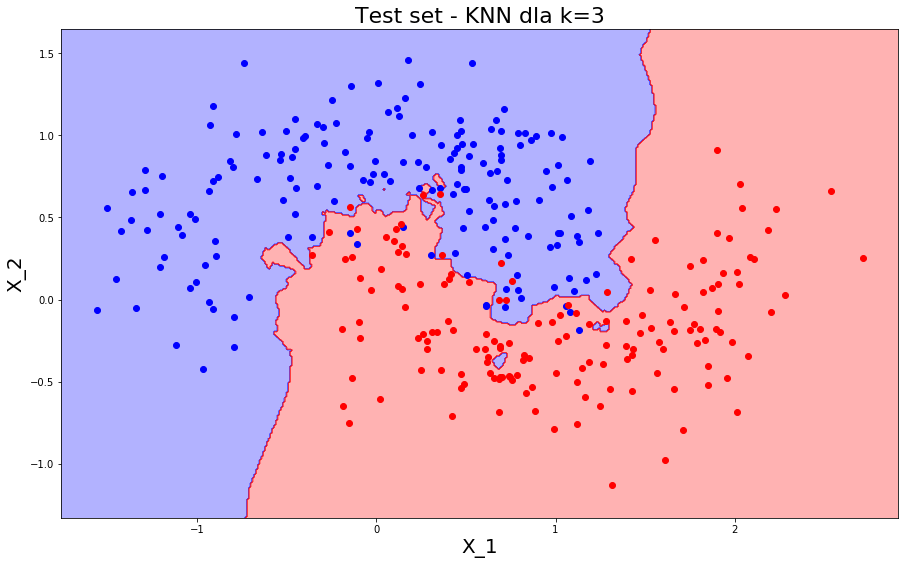

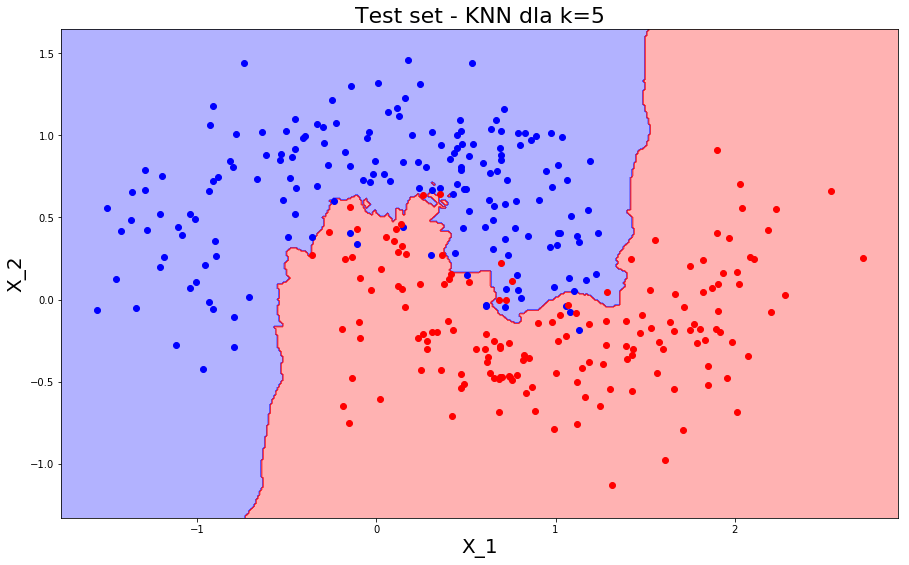

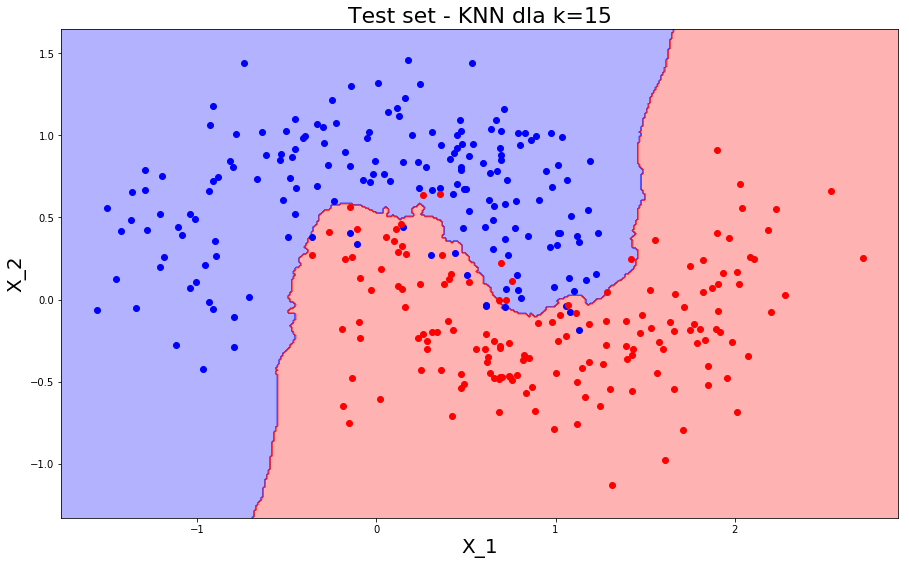

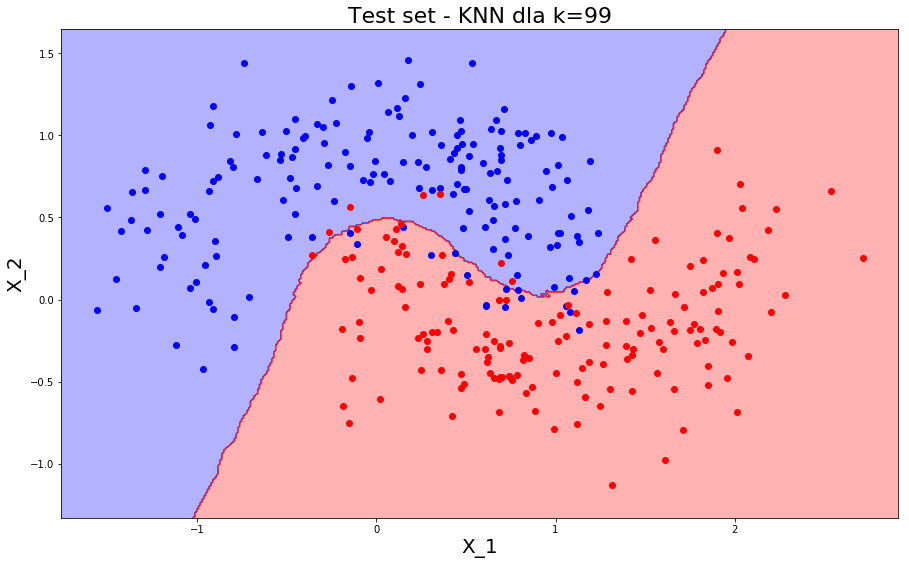

In [18]:
for k in [3, 5, 15, 99]:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)
    hlp.plot_classification(X=X_test, y=y_test, clf=clf_knn, title='Test set - KNN dla k={}'.format(k))

## Regresja Logistyczna

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf_lin = LogisticRegression()

In [21]:
clf_lin.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

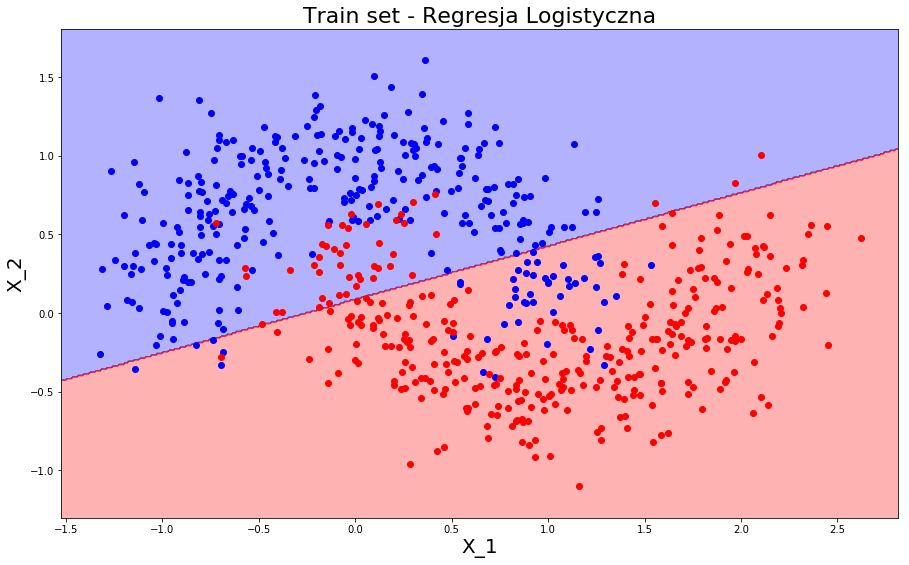

In [22]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_lin, title='Train set - Regresja Logistyczna')

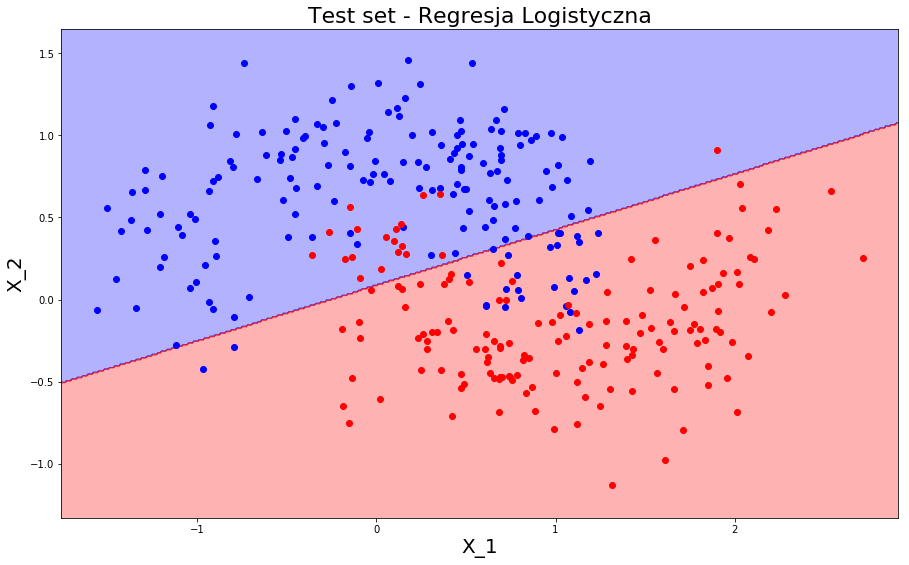

In [23]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_lin, title='Test set - Regresja Logistyczna')

In [24]:
coeff_lin = pd.DataFrame(clf_lin.coef_.ravel(),index=df.columns[:-1],columns=['Coefficient'])
coeff_lin

,Coefficient
X_1,1.248348
X_2,-3.679342


## Regresja Wielomianowa

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

In [26]:
X_poly.shape

(1000, 15)

In [27]:
X_poly[0]

array([ 1.00000000e+00, -1.41764978e-01,  5.58236295e-01,  2.00973089e-02,
       -7.91383558e-02,  3.11627761e-01, -2.84909454e-03,  1.12190472e-02,
       -4.41779025e-02,  1.73961927e-01,  4.03901823e-04, -1.59046798e-03,
        6.26287936e-03, -2.46617086e-02,  9.71118615e-02])

In [28]:
X[0]

array([-0.14176498,  0.55823629])

In [29]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [30]:
clf_poly = LogisticRegression()

In [31]:
clf_poly.fit(X_train_poly, y_train_poly)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

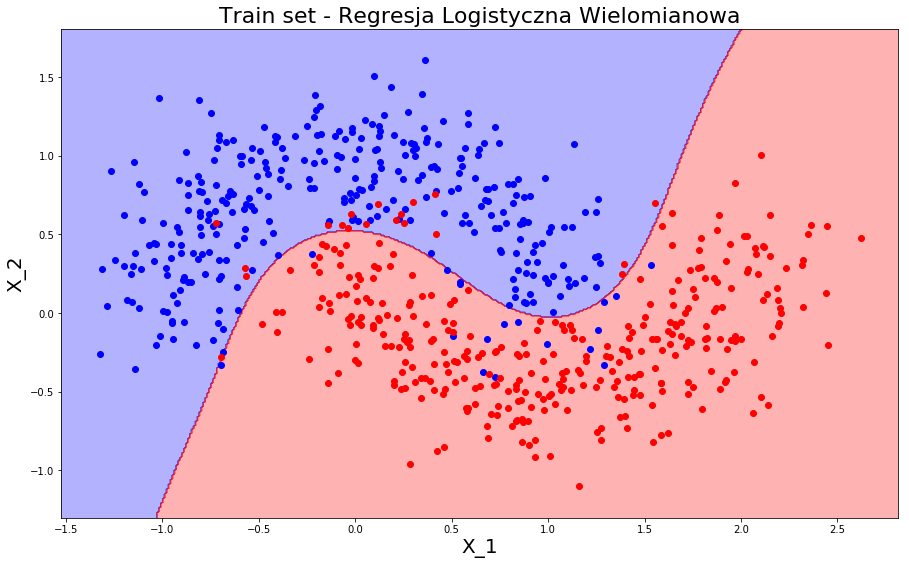

In [32]:
hlp.plot_classification_poly(X_poly=X_train_poly, 
                             y=y_train_poly, 
                             clf_poly=clf_poly, 
                             poly=poly, 
                             title='Train set - Regresja Logistyczna Wielomianowa')

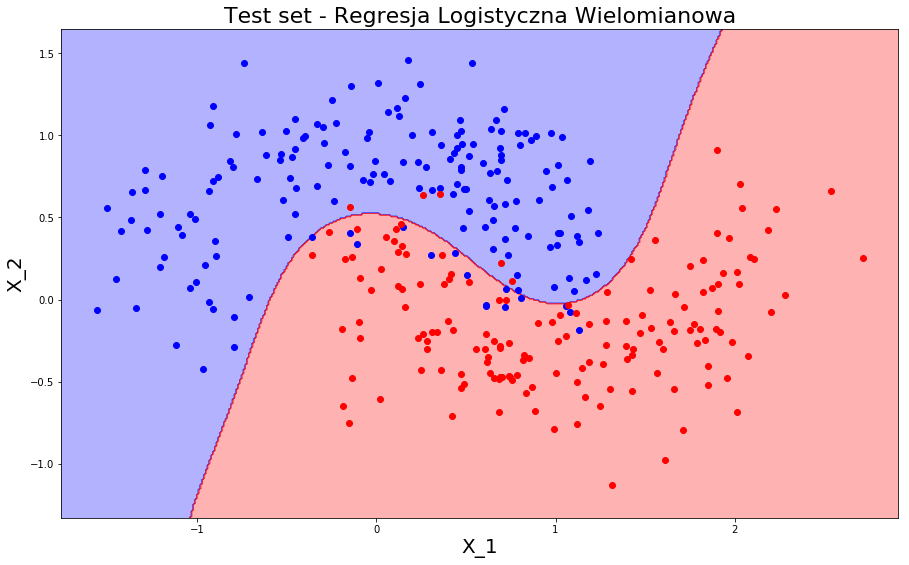

In [33]:
hlp.plot_classification_poly(X_poly=X_test_poly, 
                             y=y_test_poly, 
                             clf_poly=clf_poly, 
                             poly=poly, 
                             title='Test set - Regresja Logistyczna Wielomianowa')

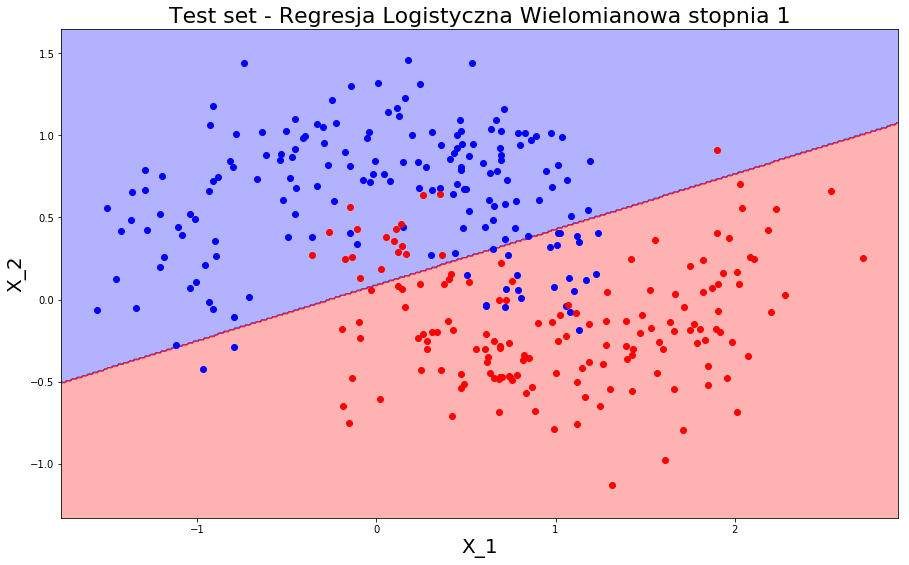

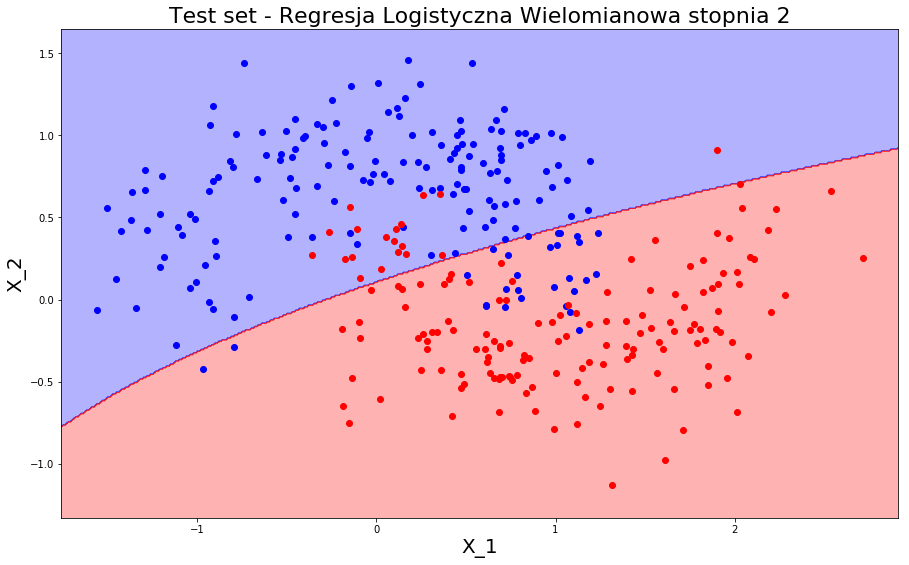

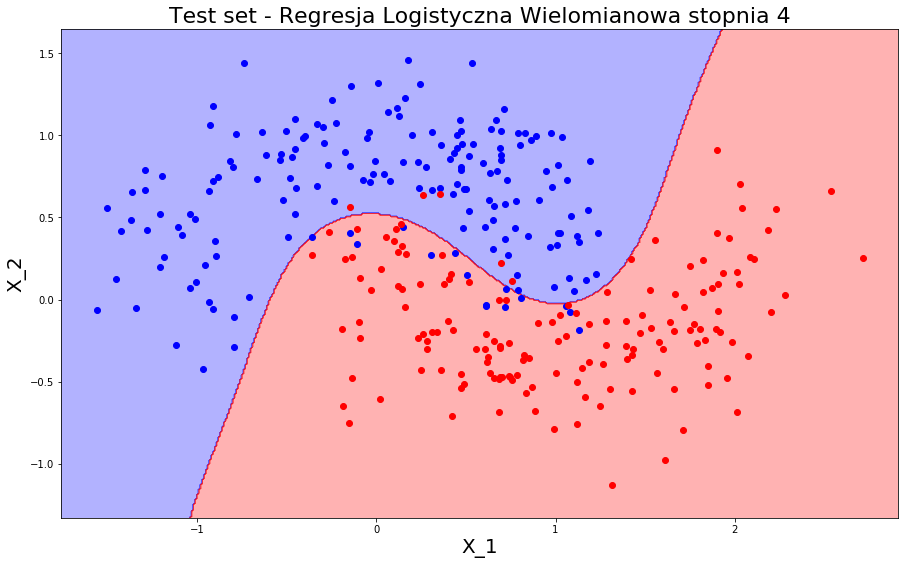

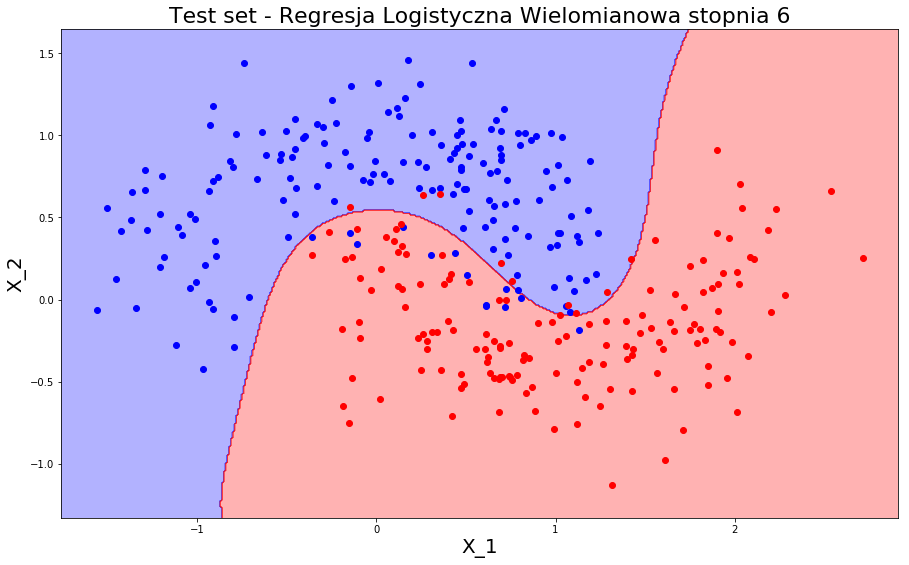

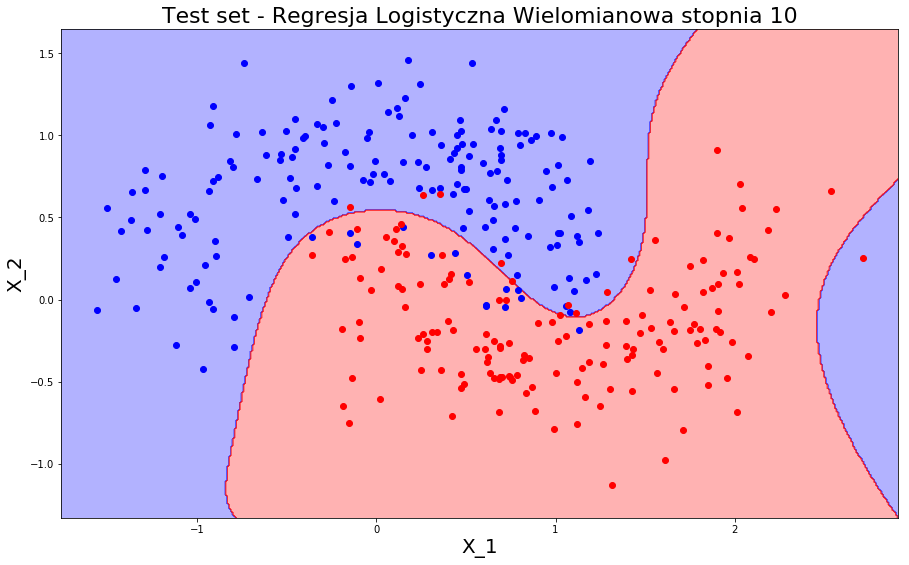

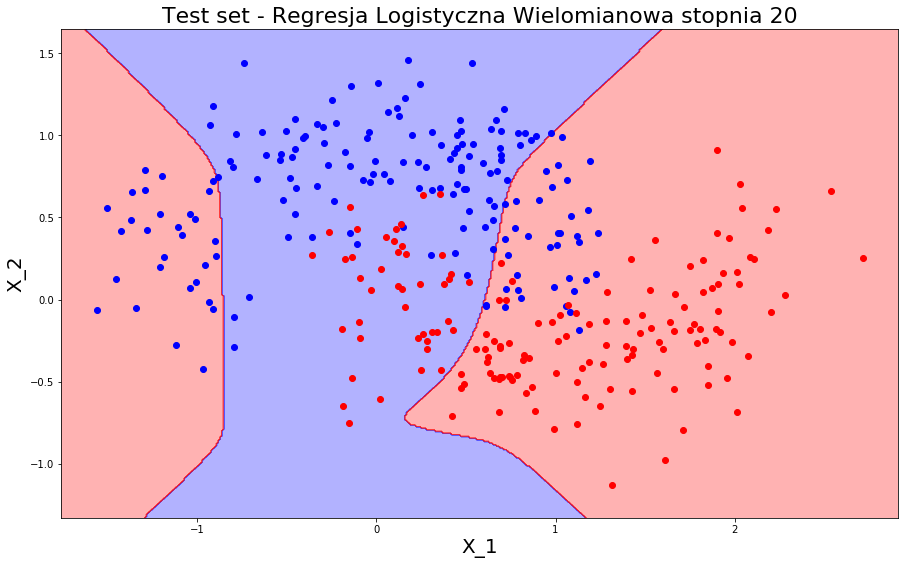

In [34]:
for n in [1, 2, 4, 6, 10, 20]:
    poly = PolynomialFeatures(degree = n)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.33, random_state=42)
    clf_poly = LogisticRegression()
    clf_poly.fit(X_train_poly, y_train_poly)
    hlp.plot_classification_poly(X_poly=X_test_poly, 
                                 y=y_test_poly, 
                                 clf_poly=clf_poly, 
                                 poly=poly, 
                                 title='Test set - Regresja Logistyczna Wielomianowa stopnia {}'.format(n))
    

## SVM

In [35]:
from sklearn.svm import SVC

In [36]:
# clf_svm = SVC(kernel="linear", C=float("inf"))
clf_svm_lin = SVC(kernel="linear", C=1)

In [37]:
clf_svm_lin.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

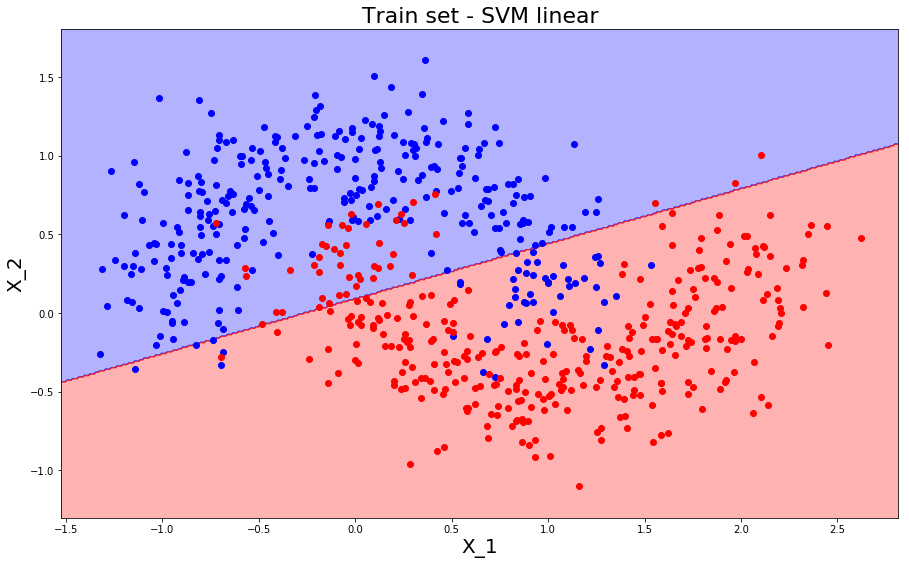

In [38]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_svm_lin, title='Train set - SVM linear')

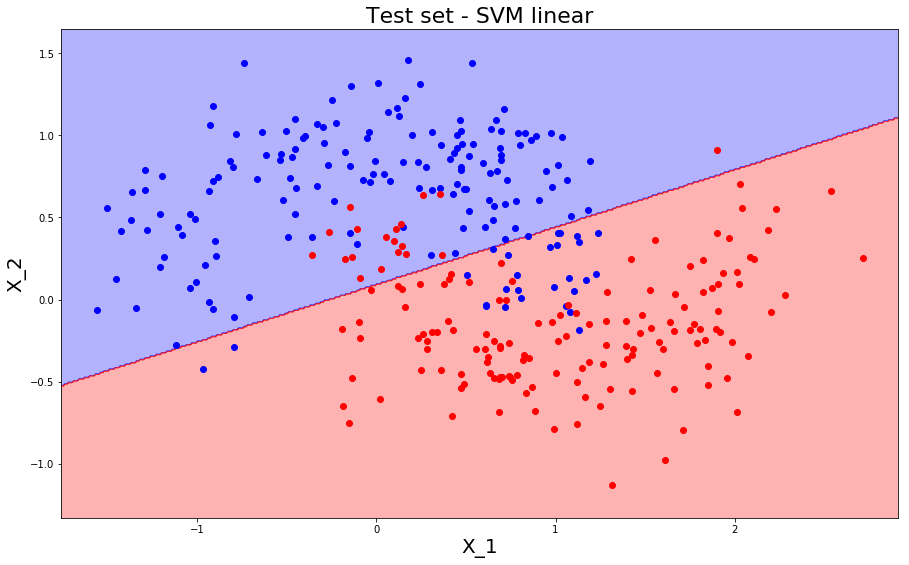

In [39]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_svm_lin, title='Test set - SVM linear')

In [40]:
clf_svm_lin.coef_

array([[ 0.8496419 , -2.43021407]])

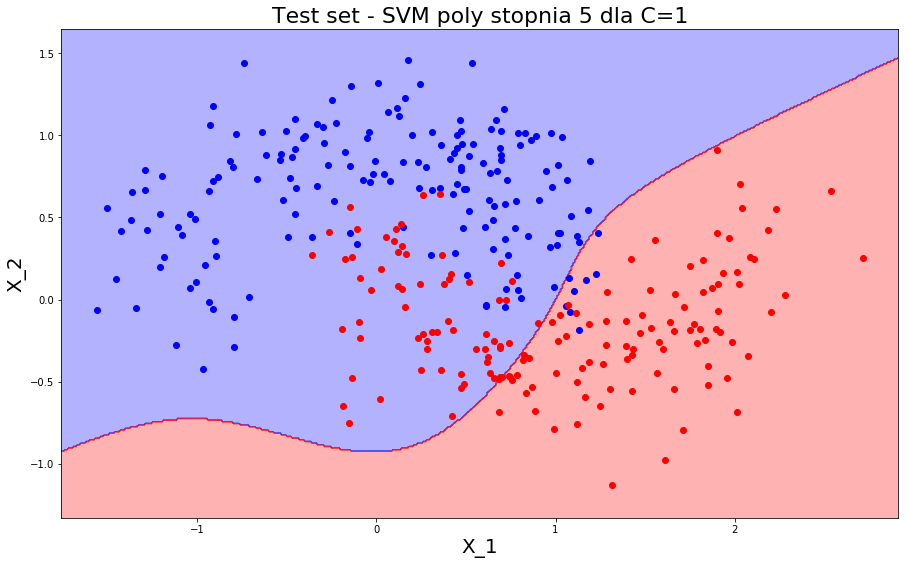

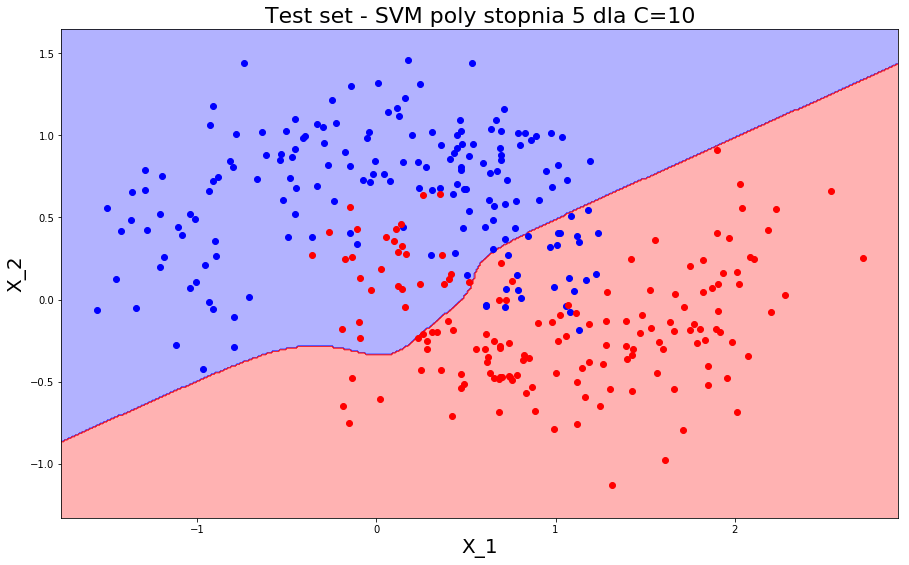

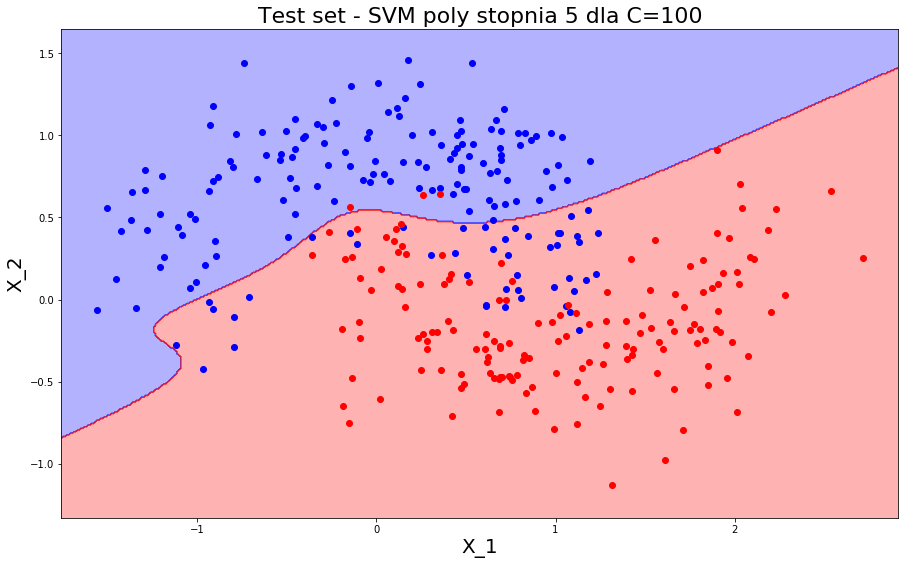

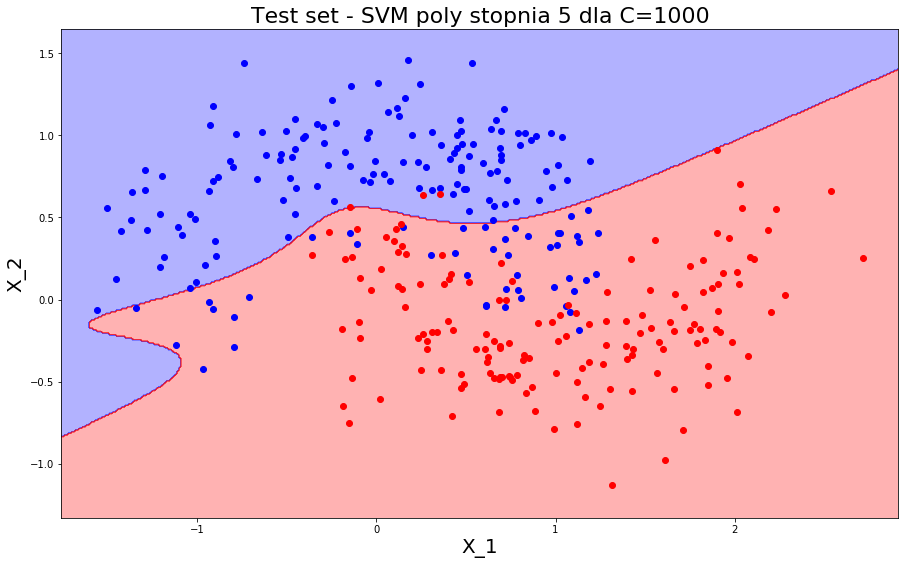

In [41]:
for c in [1, 10, 100, 1000]:
    clf_svm_poly = SVC(kernel="poly", degree=5, C=c)
    clf_svm_poly.fit(X_train, y_train)
    hlp.plot_classification(X=X_test, y=y_test, clf=clf_svm_poly, title='Test set - SVM poly stopnia 5 dla C={}'.format(c))

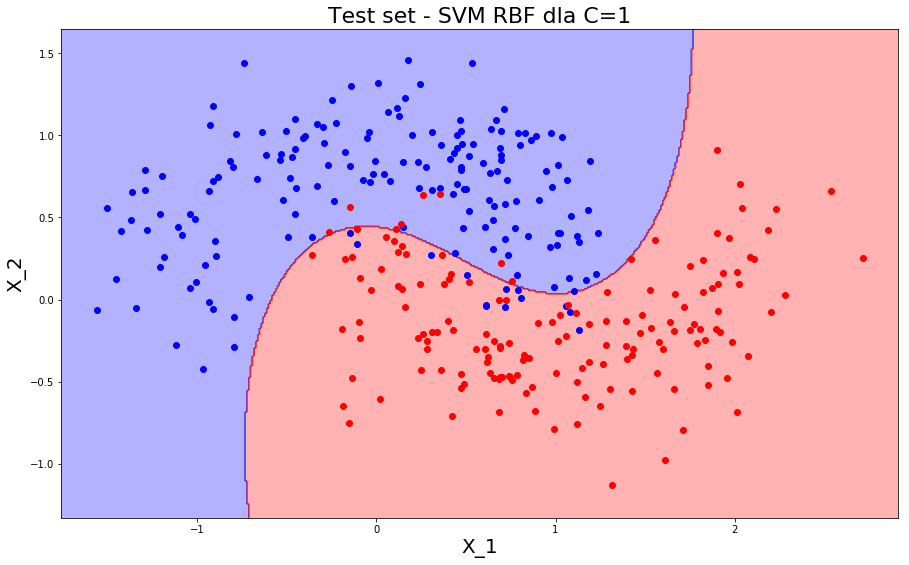

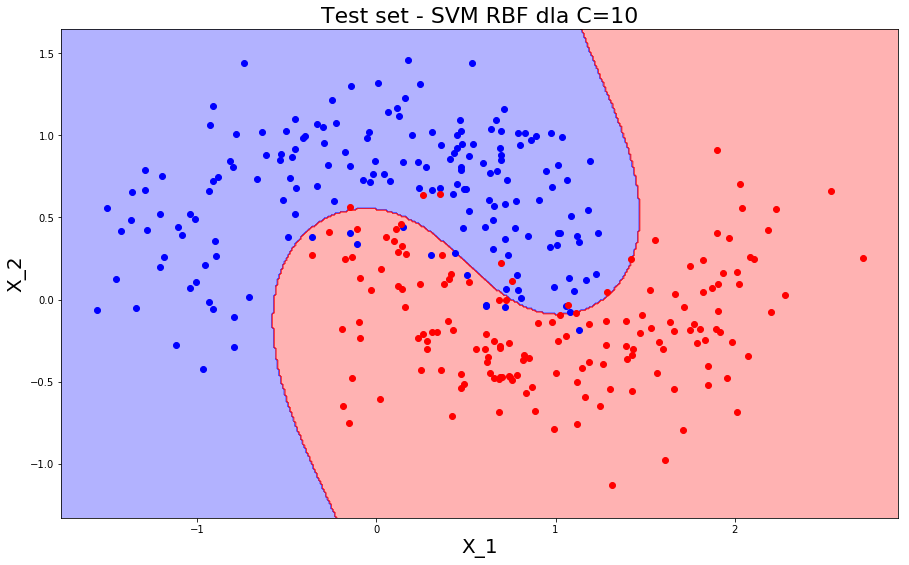

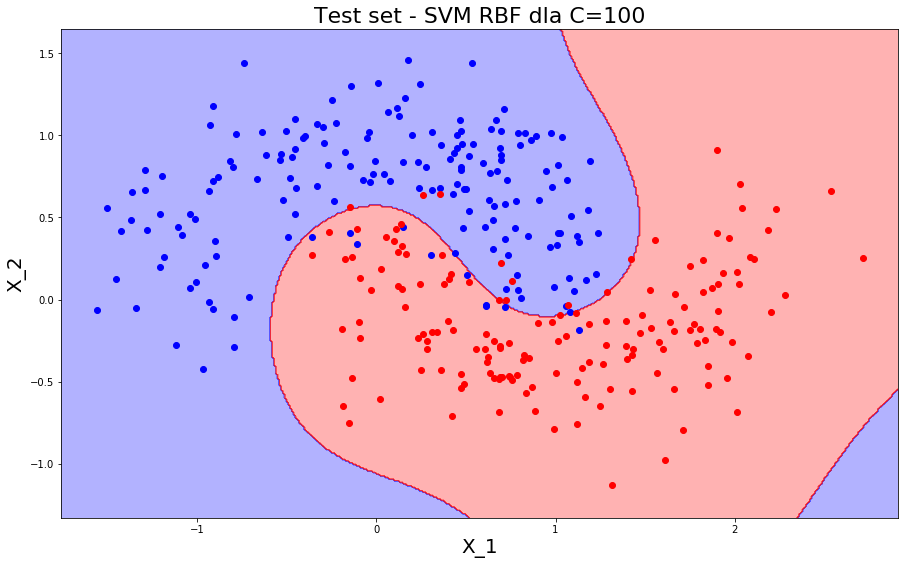

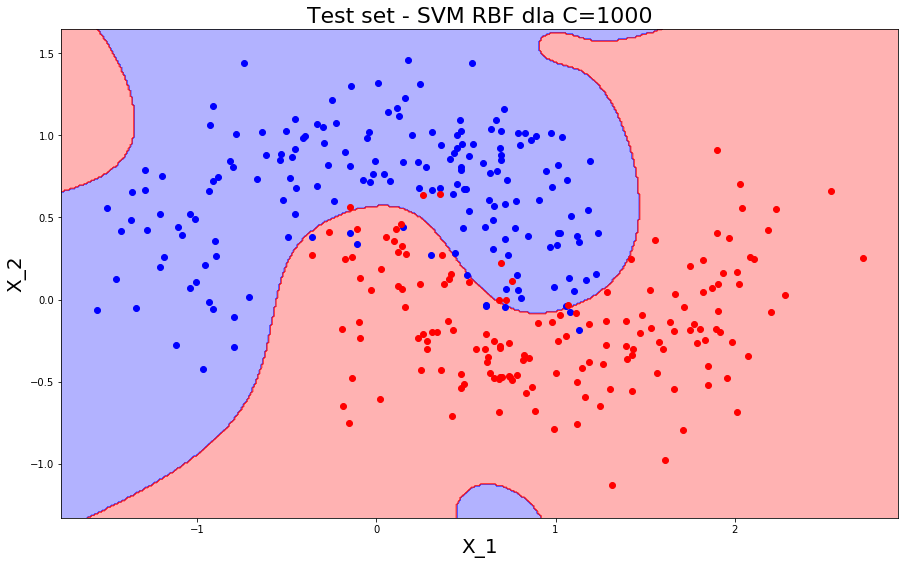

In [42]:
for c in [1, 10, 100, 1000]:
    clf_svm_rbf = SVC(kernel="rbf", C=c)
    clf_svm_rbf.fit(X_train, y_train)
    hlp.plot_classification(X=X_test, y=y_test, clf=clf_svm_rbf, title='Test set - SVM RBF dla C={}'.format(c))

## Drzewa decyzyjne

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [45]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

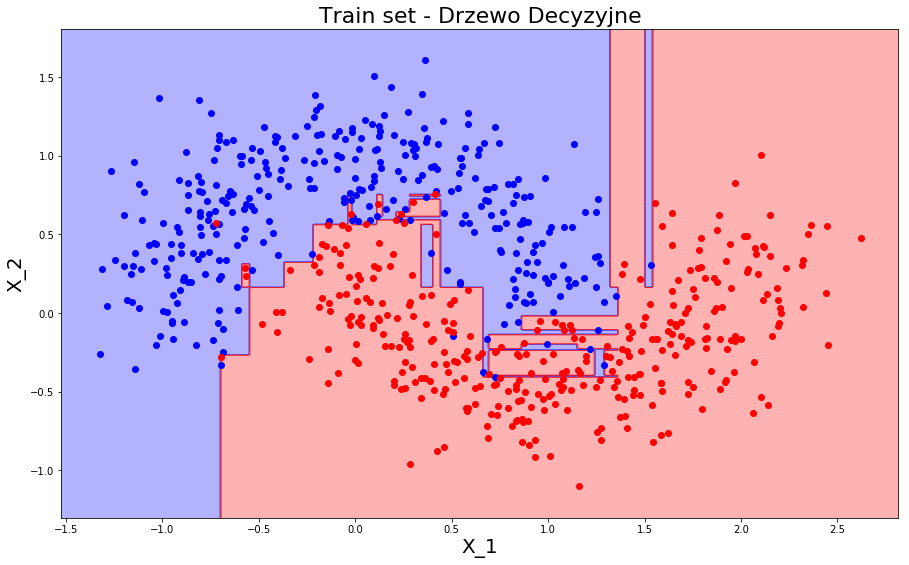

In [46]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_tree, title='Train set - Drzewo Decyzyjne')

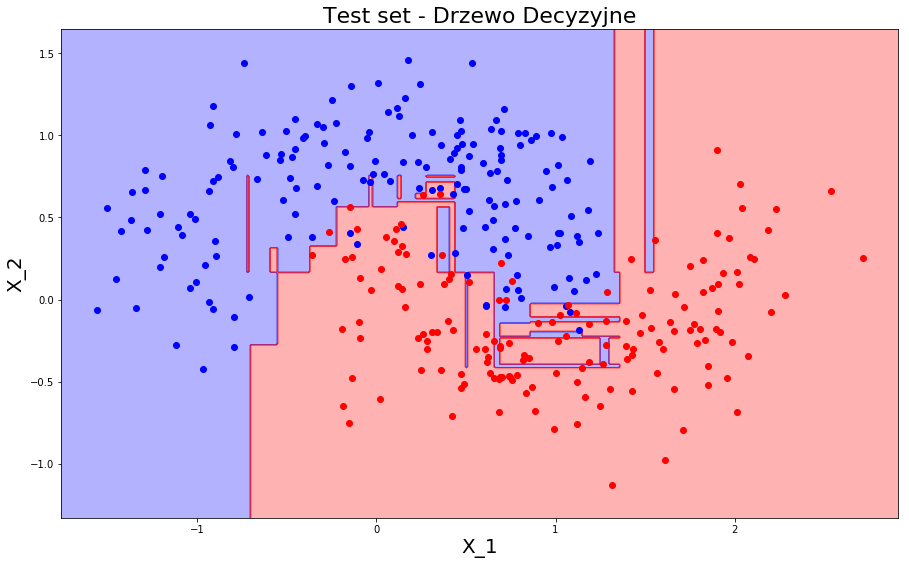

In [47]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_tree, title='Test set - Drzewo Decyzyjne')

In [48]:
coeff_tree = pd.DataFrame(clf_tree.feature_importances_.ravel(),index=df.columns[:-1],columns=['Istotność zmiennej'])
coeff_tree

,Istotność zmiennej
X_1,0.506762
X_2,0.493238


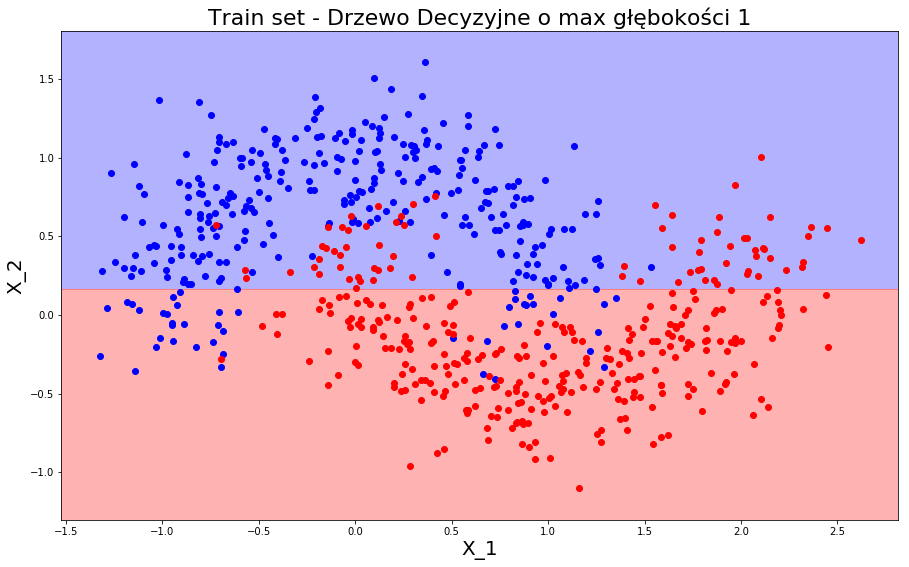

     Istotność zmiennej
X_1                 0.0
X_2                 1.0


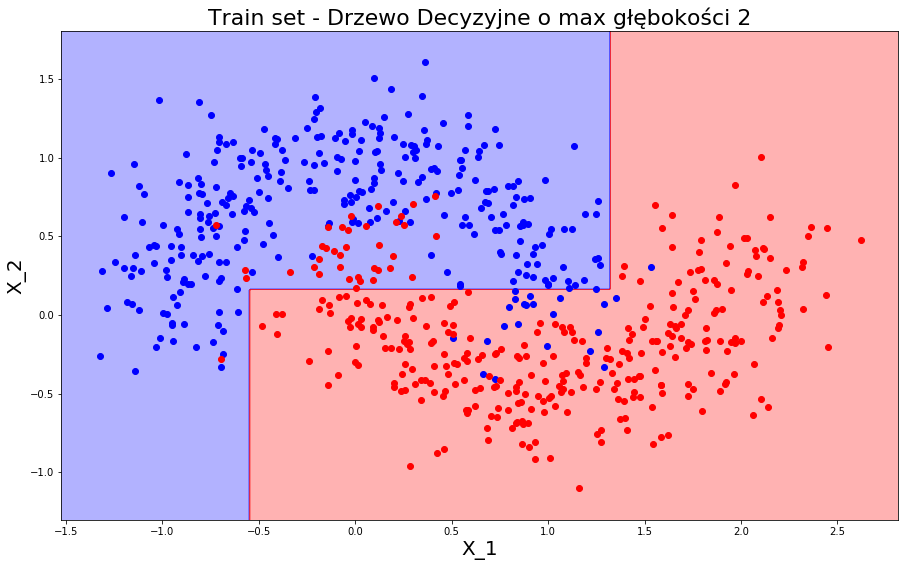

     Istotność zmiennej
X_1            0.445086
X_2            0.554914


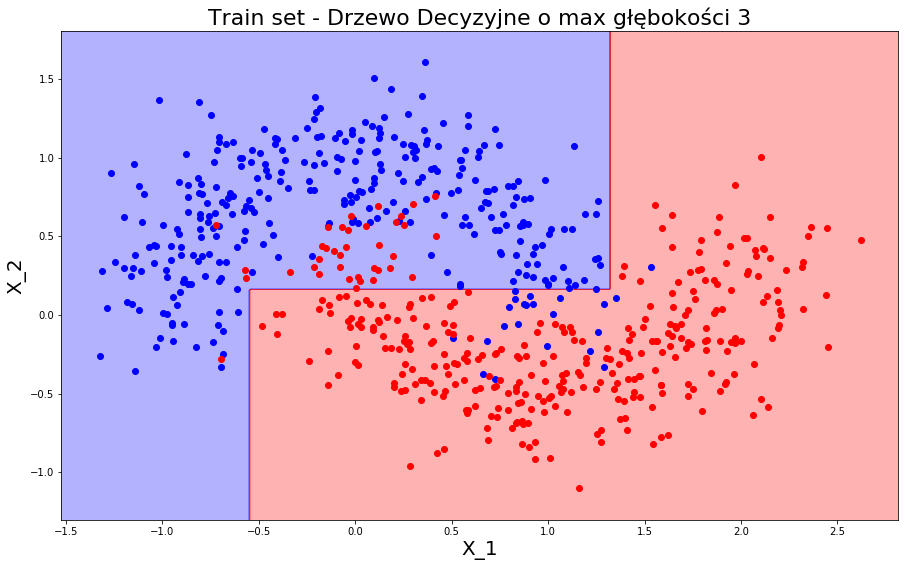

     Istotność zmiennej
X_1            0.400551
X_2            0.599449


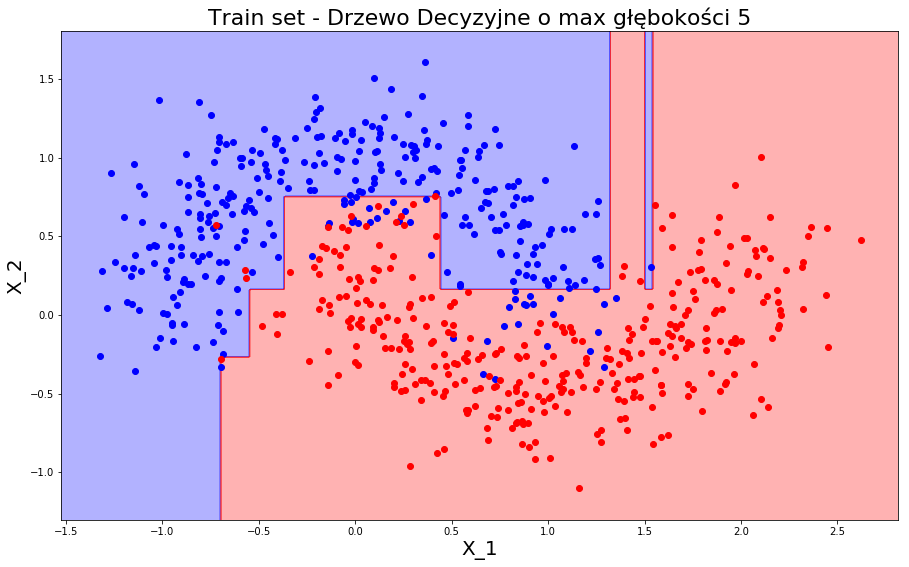

     Istotność zmiennej
X_1            0.517557
X_2            0.482443


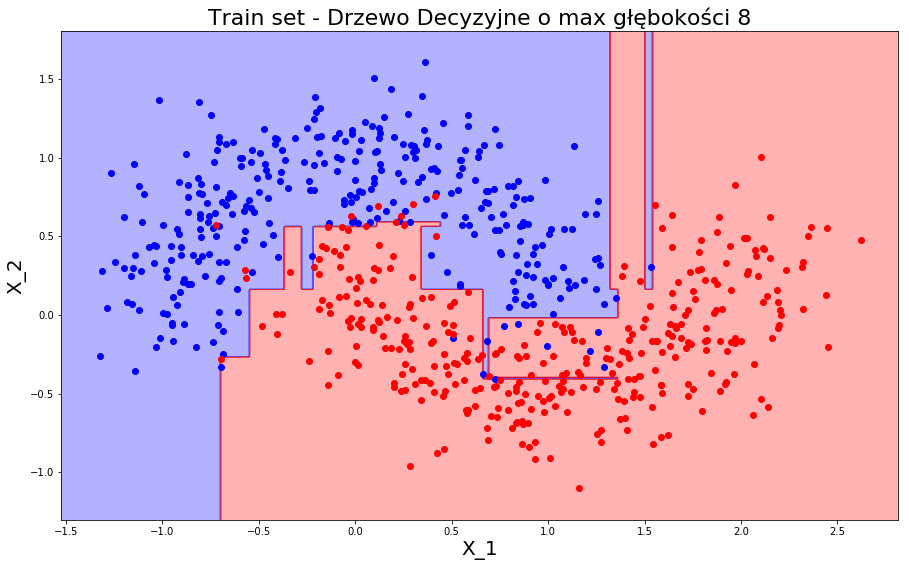

     Istotność zmiennej
X_1            0.505288
X_2            0.494712


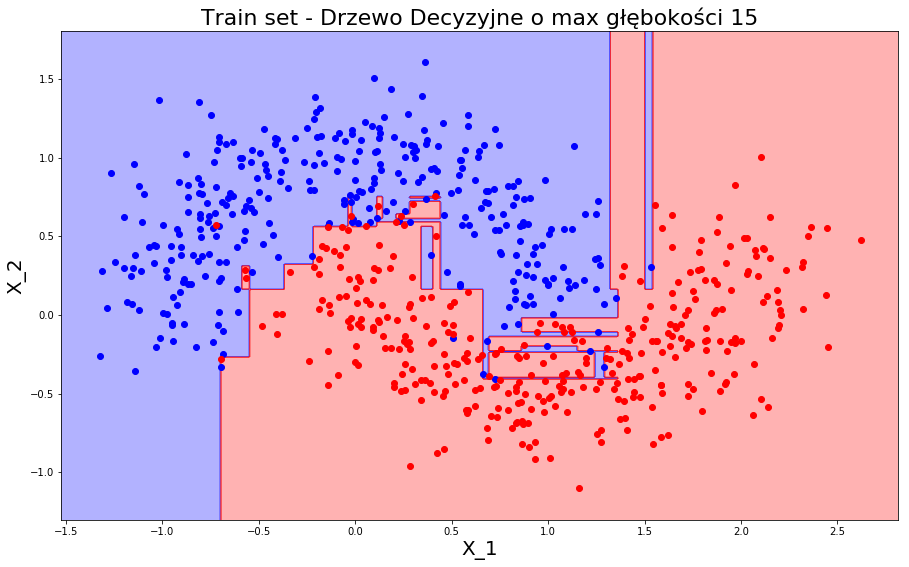

     Istotność zmiennej
X_1            0.506762
X_2            0.493238


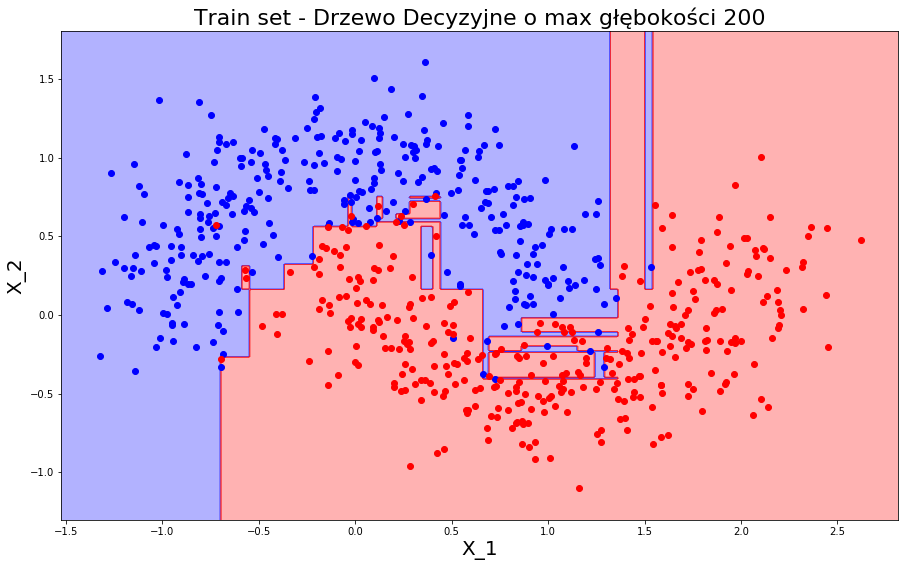

     Istotność zmiennej
X_1            0.506762
X_2            0.493238


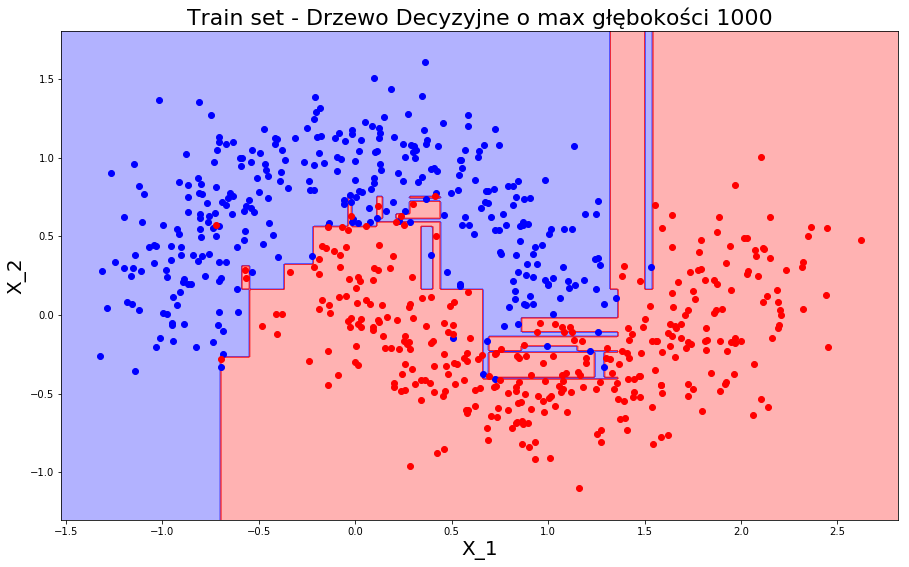

     Istotność zmiennej
X_1            0.506762
X_2            0.493238


In [49]:
for d in [1, 2, 3, 5, 8, 15, 200, 1000]:
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=d)
    clf_tree.fit(X_train, y_train)
    hlp.plot_classification(X=X_train, y=y_train, clf=clf_tree, title='Train set - Drzewo Decyzyjne o max głębokości {}'.format(d))
    coeff_tree = pd.DataFrame(clf_tree.feature_importances_.ravel(),index=df.columns[:-1],columns=['Istotność zmiennej'])
    print(coeff_tree)

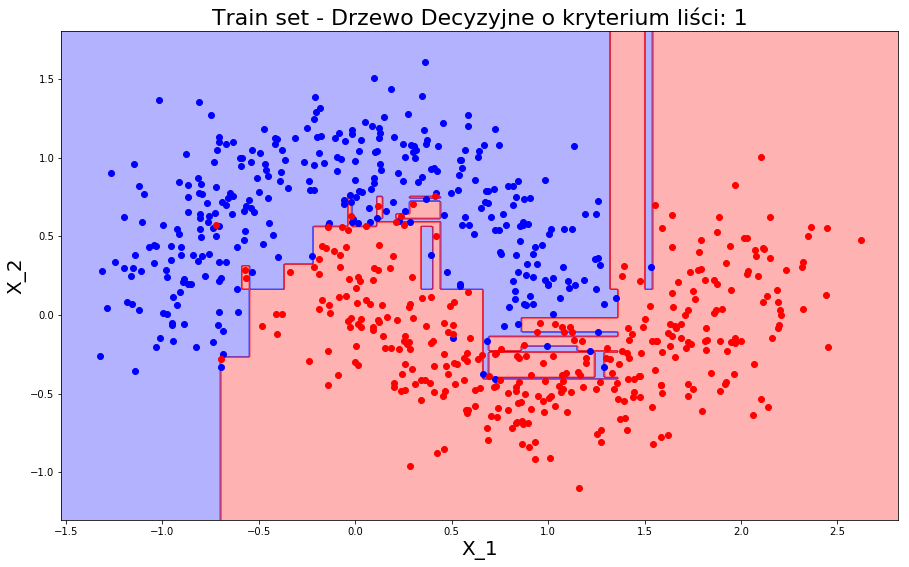

     Istotność zmiennej
X_1            0.506762
X_2            0.493238


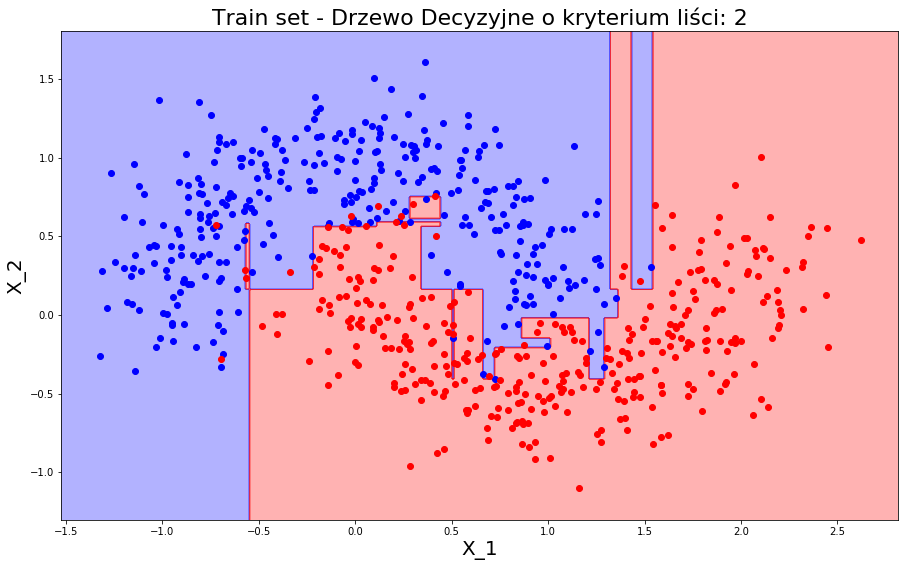

     Istotność zmiennej
X_1            0.514081
X_2            0.485919


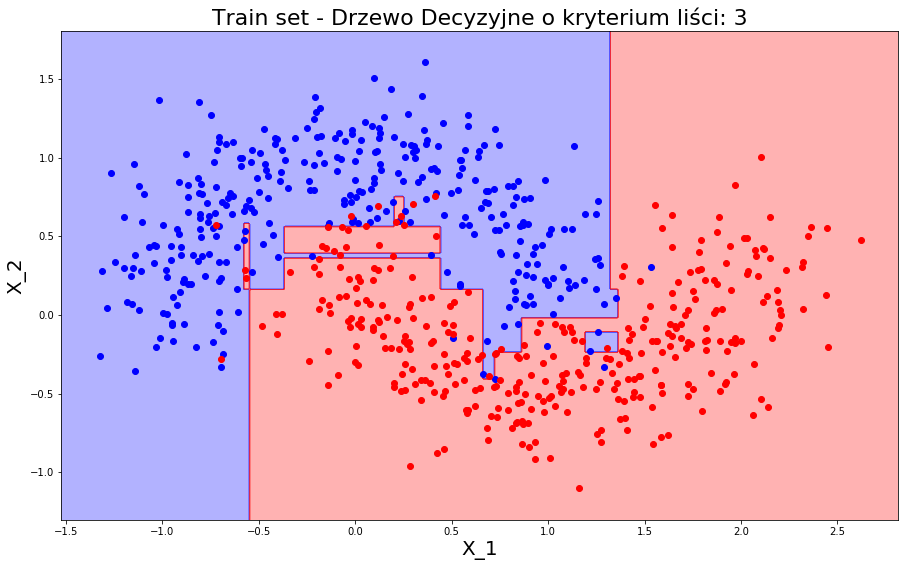

     Istotność zmiennej
X_1            0.490284
X_2            0.509716


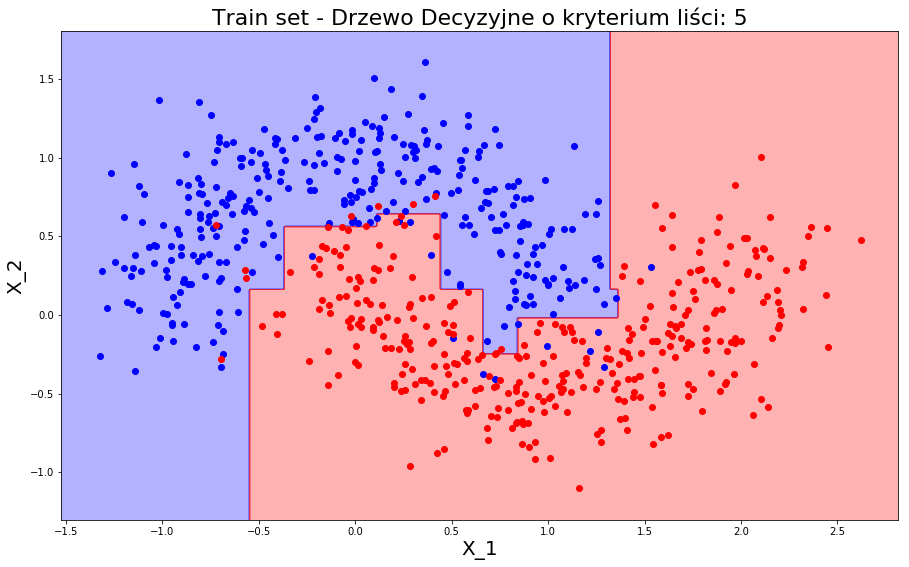

     Istotność zmiennej
X_1            0.495266
X_2            0.504734


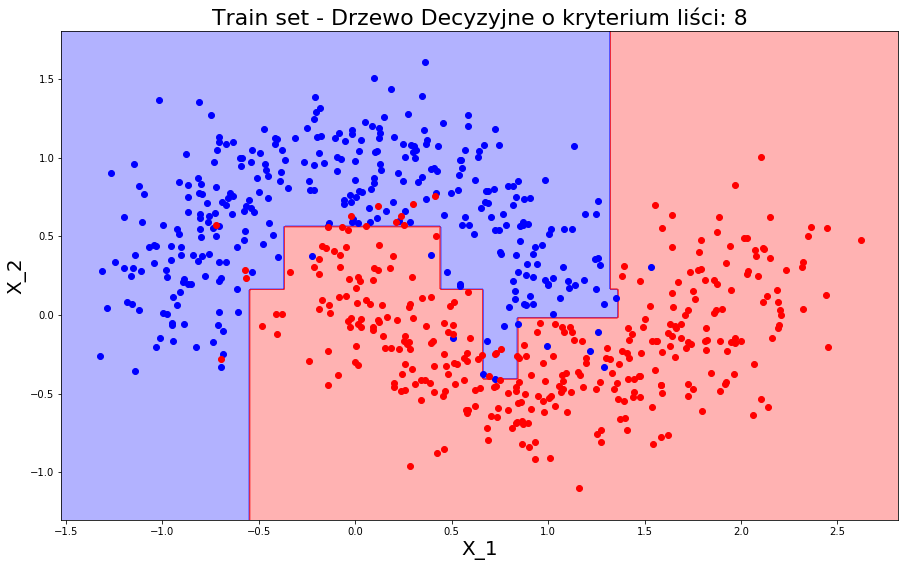

     Istotność zmiennej
X_1            0.495613
X_2            0.504387


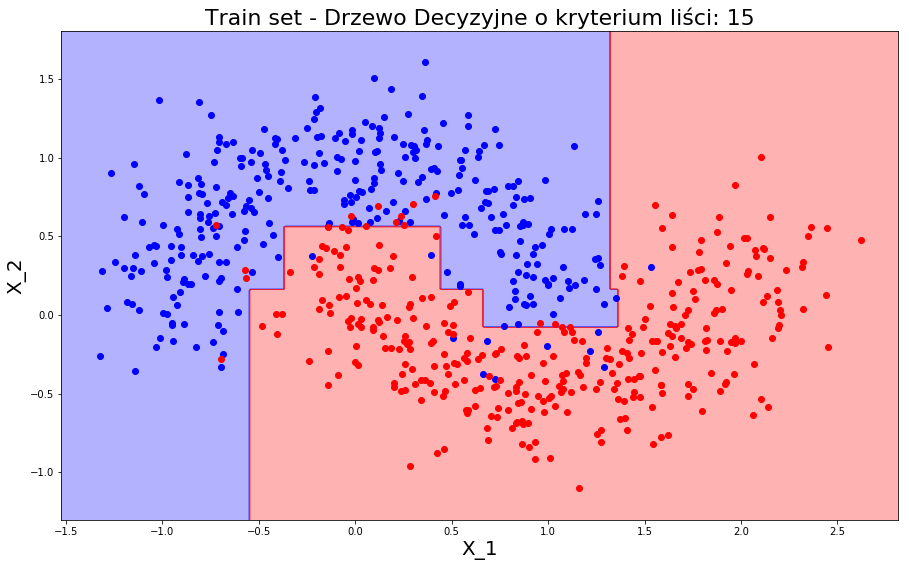

     Istotność zmiennej
X_1            0.489435
X_2            0.510565


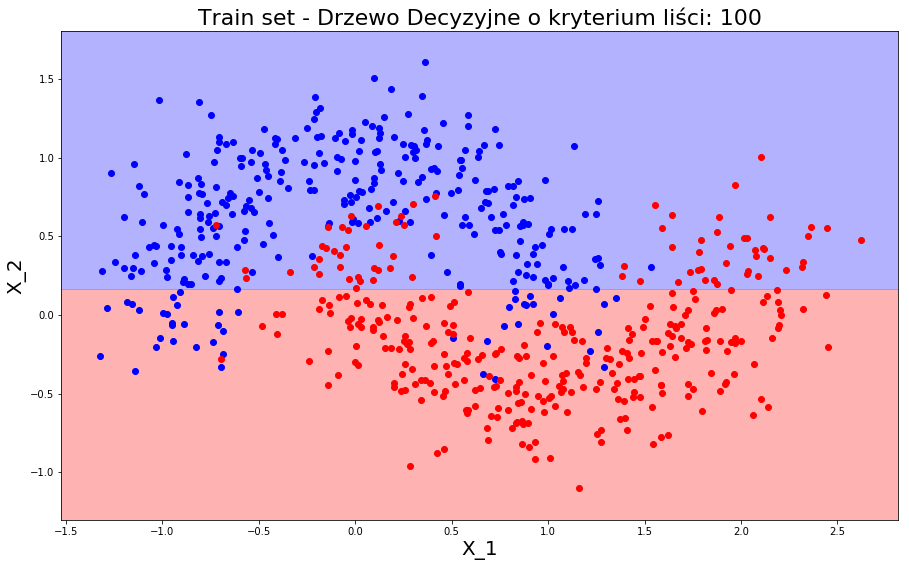

     Istotność zmiennej
X_1            0.017677
X_2            0.982323


In [50]:
for l in [1, 2, 3, 5, 8, 15, 100]:
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_leaf=l)
    clf_tree.fit(X_train, y_train)
    hlp.plot_classification(X=X_train, y=y_train, clf=clf_tree, title='Train set - Drzewo Decyzyjne o kryterium liści: {}'.format(l))
    coeff_tree = pd.DataFrame(clf_tree.feature_importances_.ravel(),index=df.columns[:-1],columns=['Istotność zmiennej'])
    print(coeff_tree)

## Lasy Losowe

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf_rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)

In [53]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

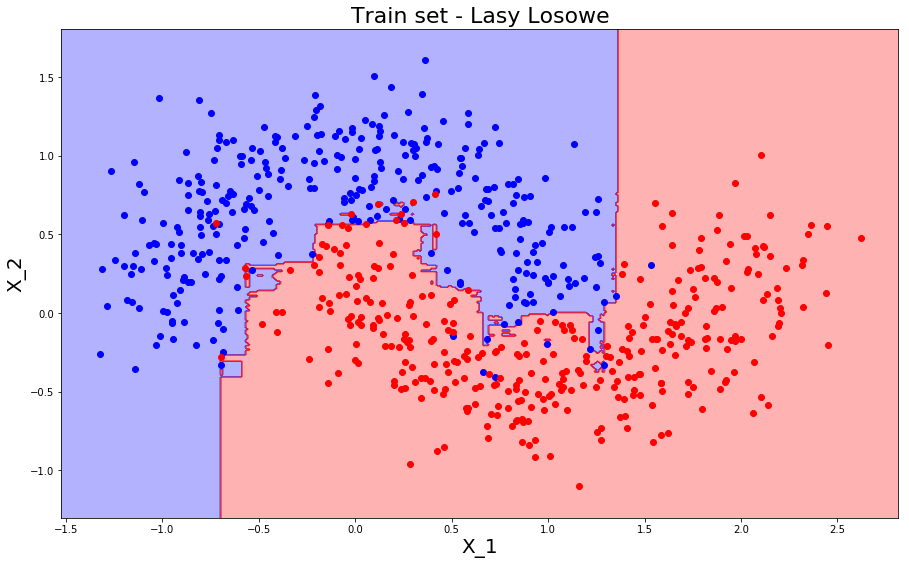

In [54]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_rf, title='Train set - Lasy Losowe')

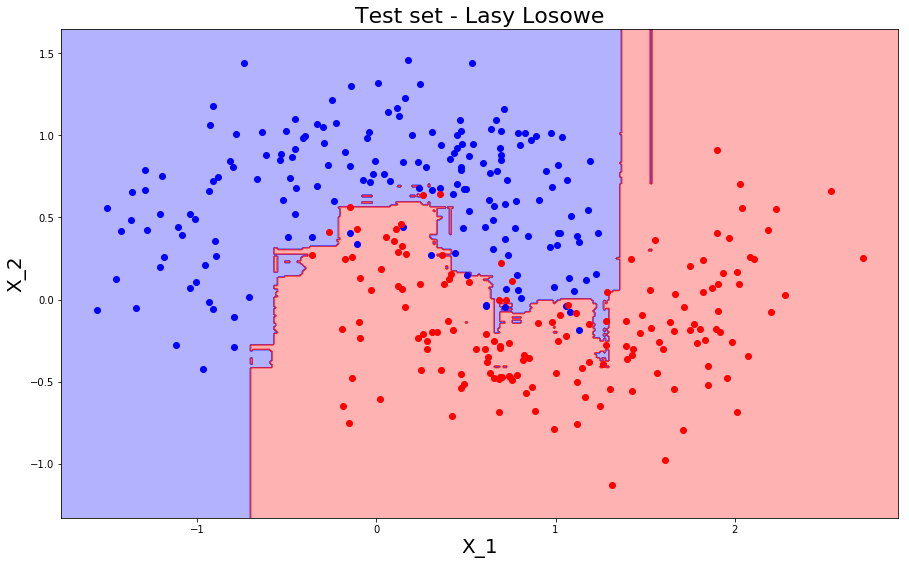

In [55]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_rf, title='Test set - Lasy Losowe')

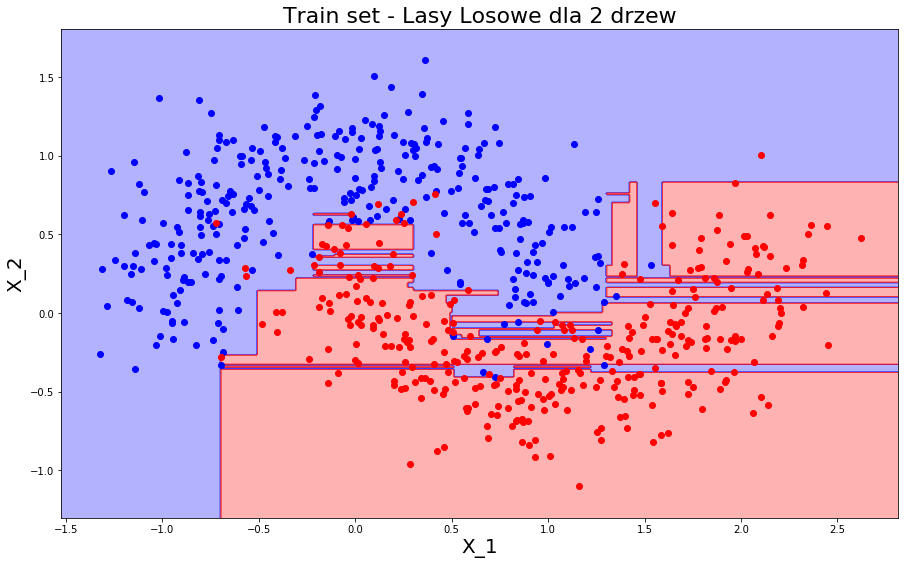

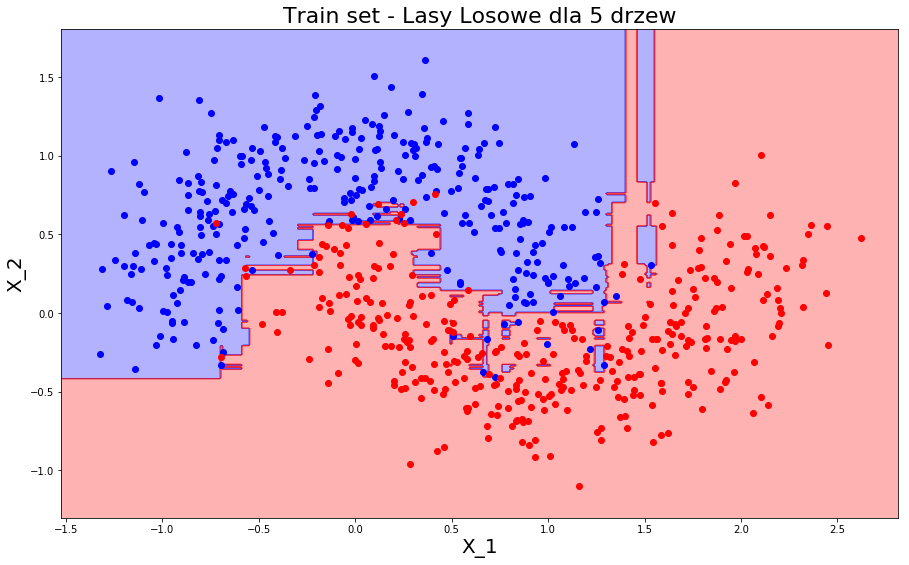

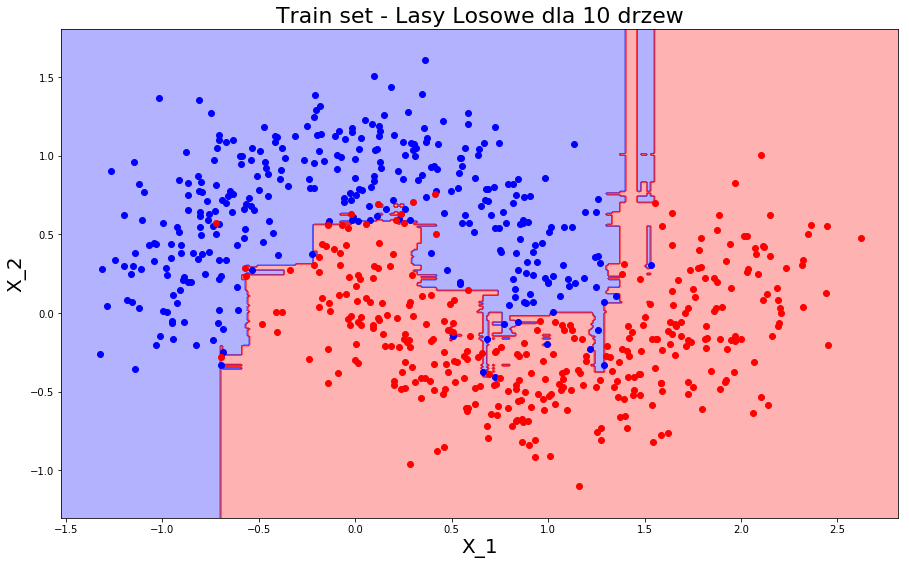

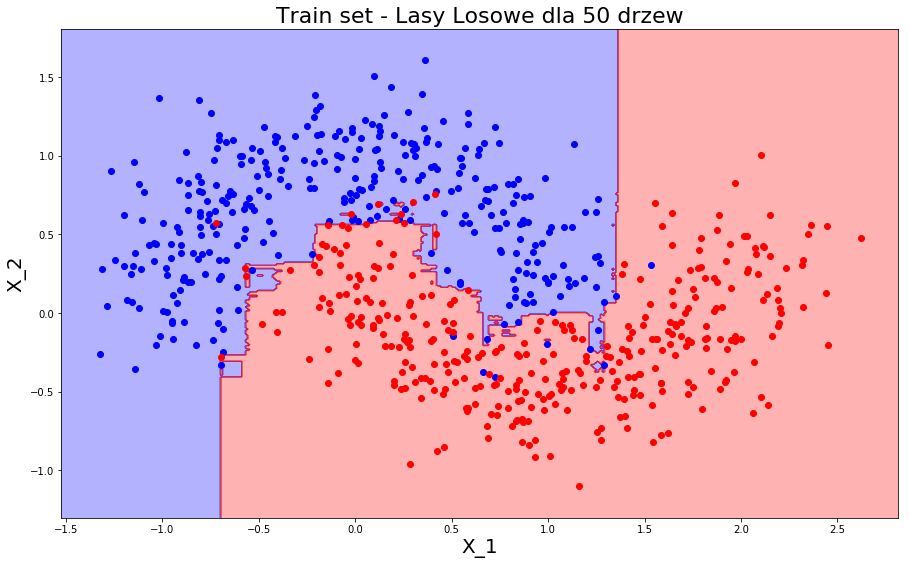

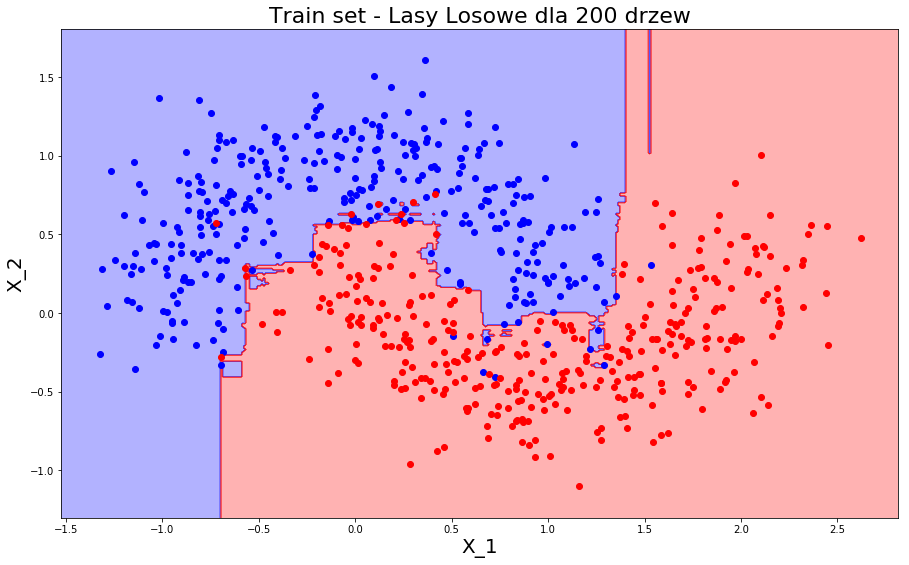

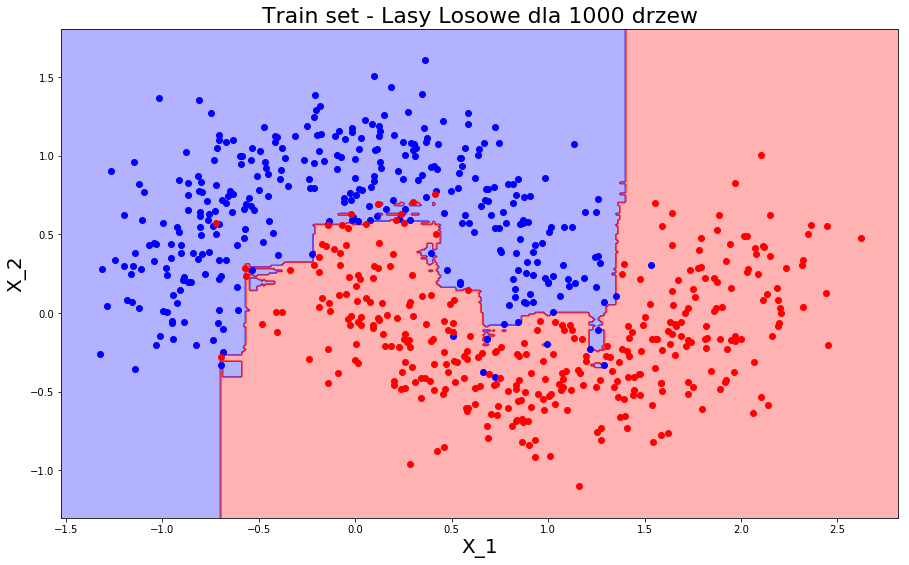

In [56]:
for n in [2, 5, 10, 50, 200, 1000]:
    clf_rf = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    clf_rf.fit(X_train, y_train)
    hlp.plot_classification(X=X_train, y=y_train, clf=clf_rf, title='Train set - Lasy Losowe dla {} drzew'.format(n))

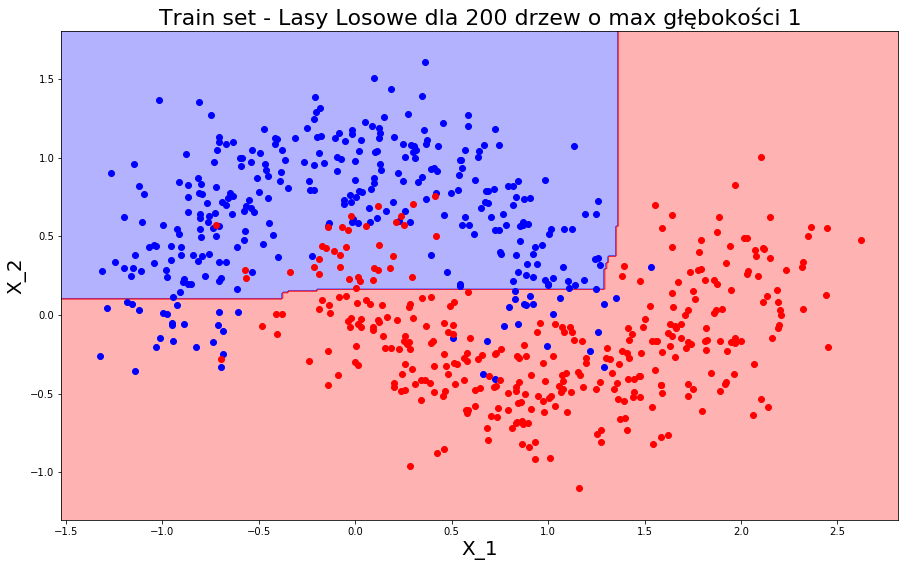

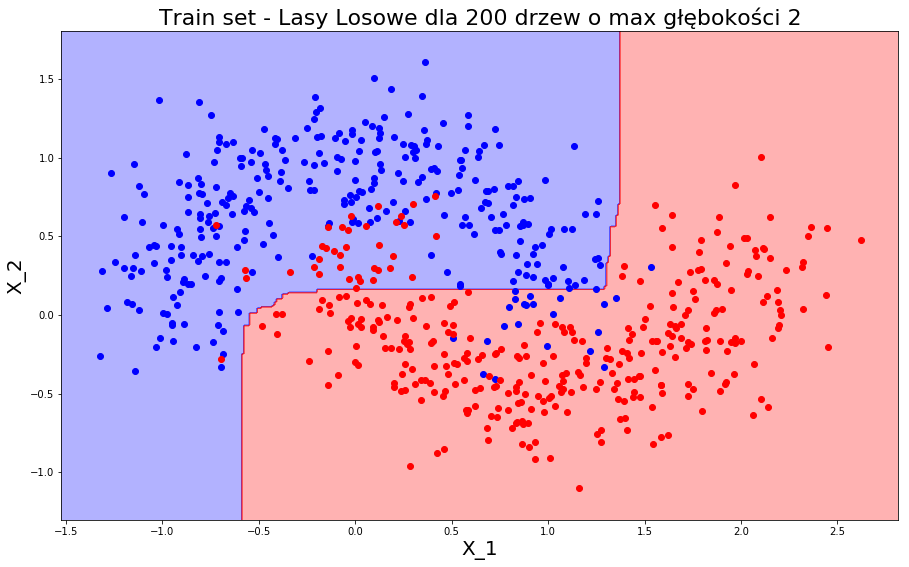

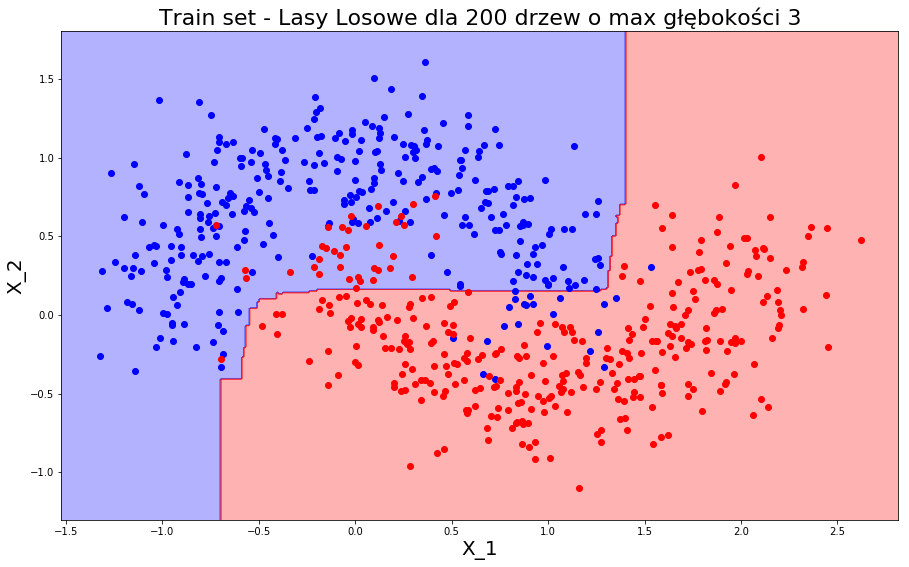

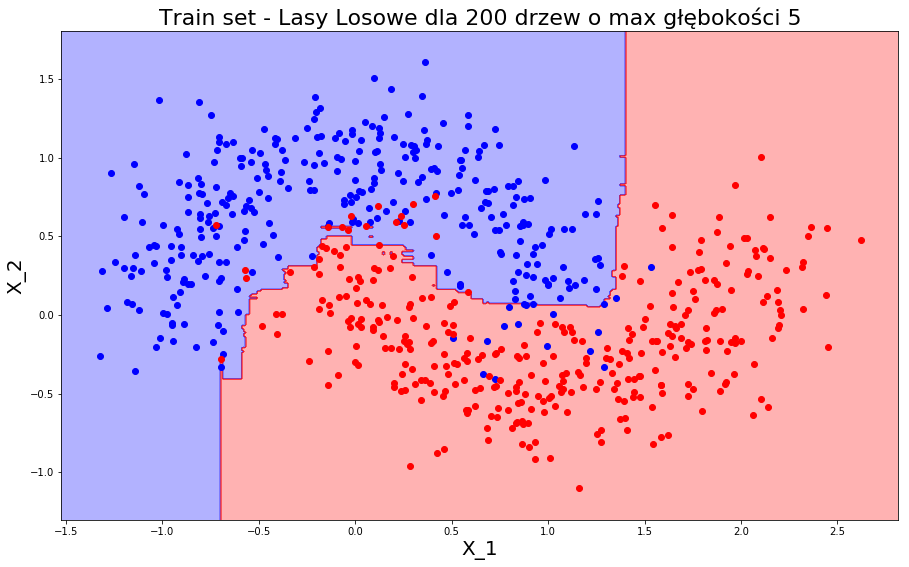

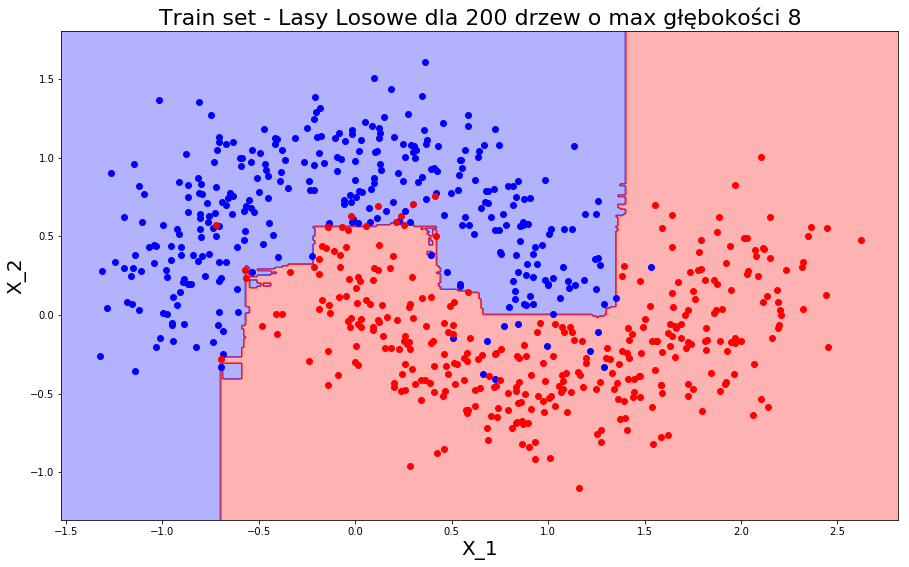

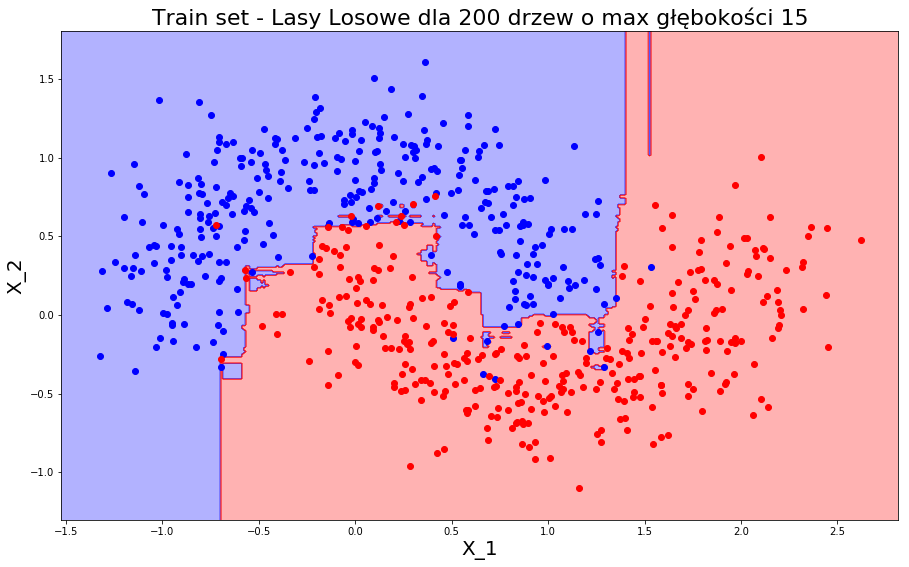

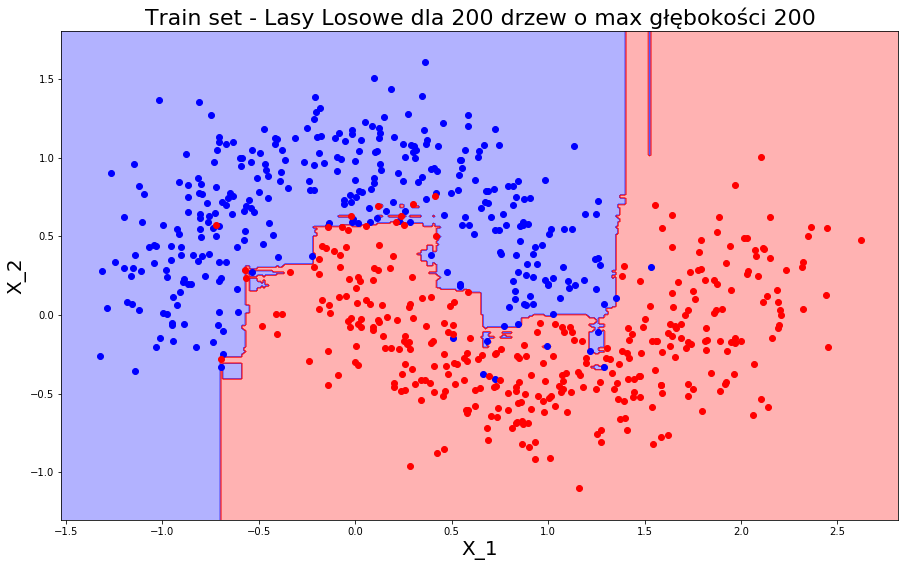

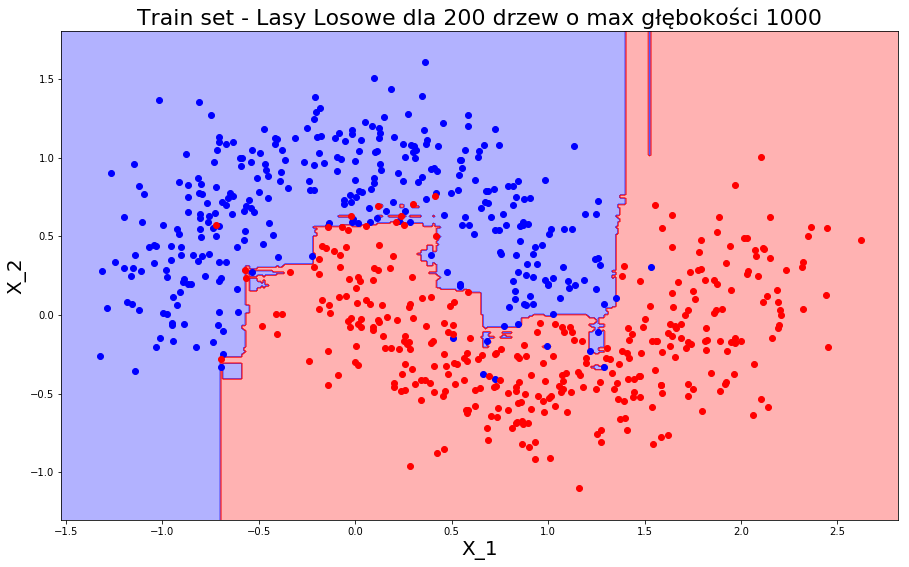

In [57]:
for d in [1, 2, 3, 5, 8, 15, 200, 1000]:
    clf_rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0, max_depth=d)
    clf_rf.fit(X_train, y_train)
    hlp.plot_classification(X=X_train, y=y_train, clf=clf_rf, title='Train set - Lasy Losowe dla 200 drzew o max głębokości {}'.format(d))

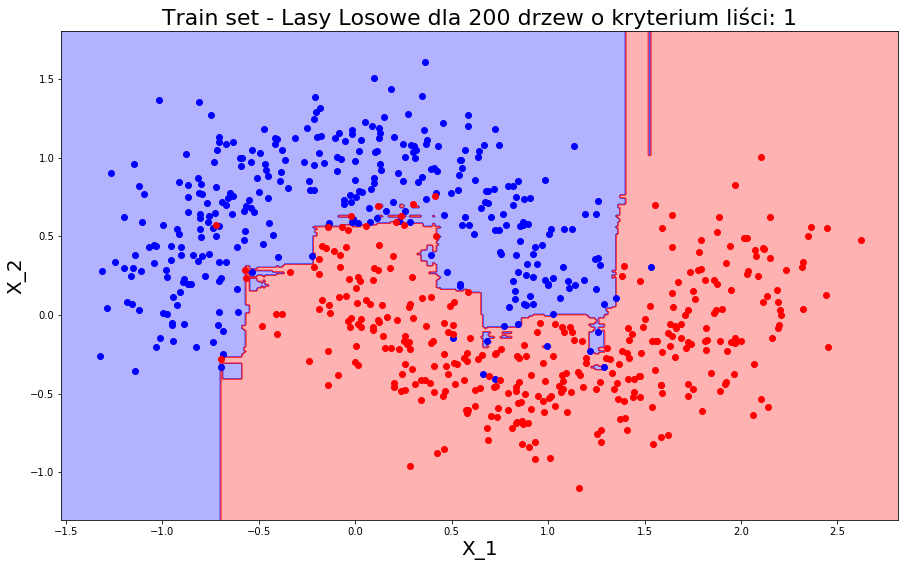

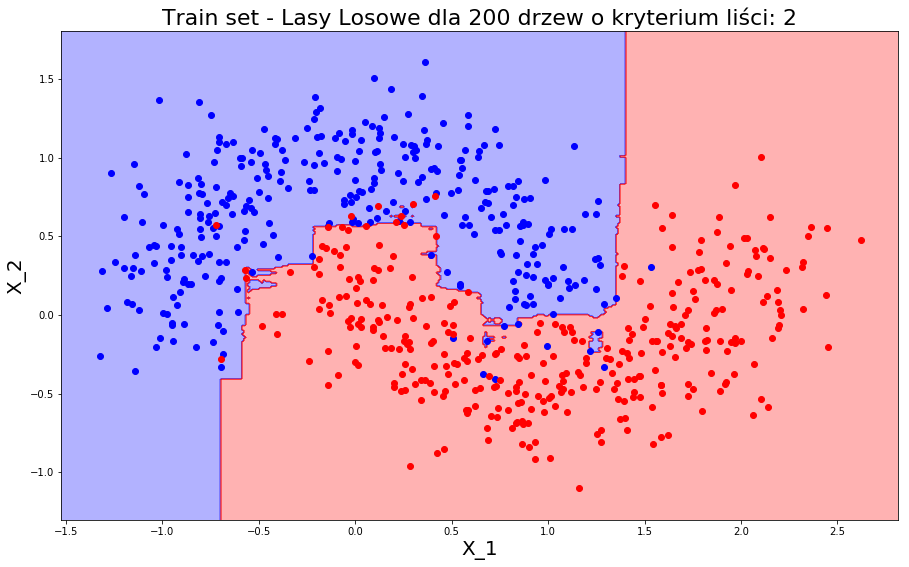

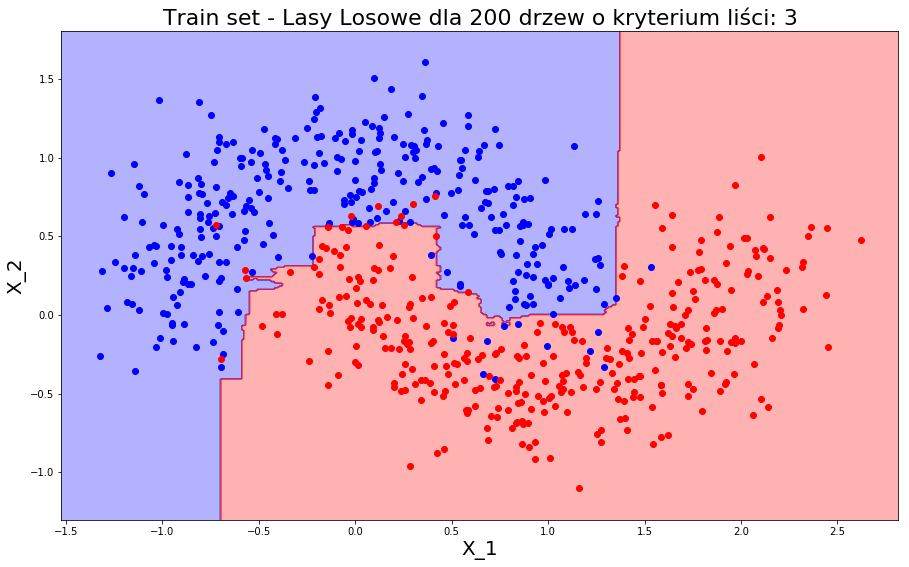

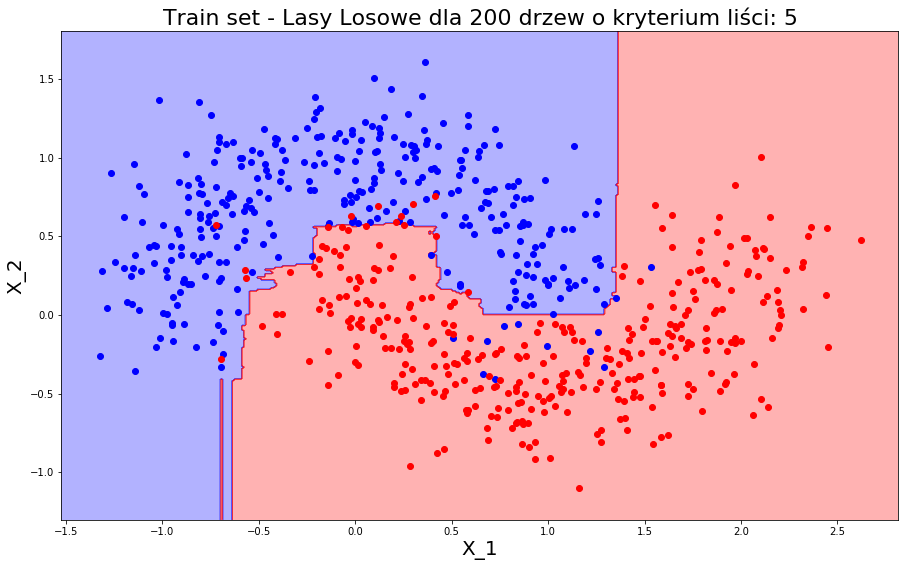

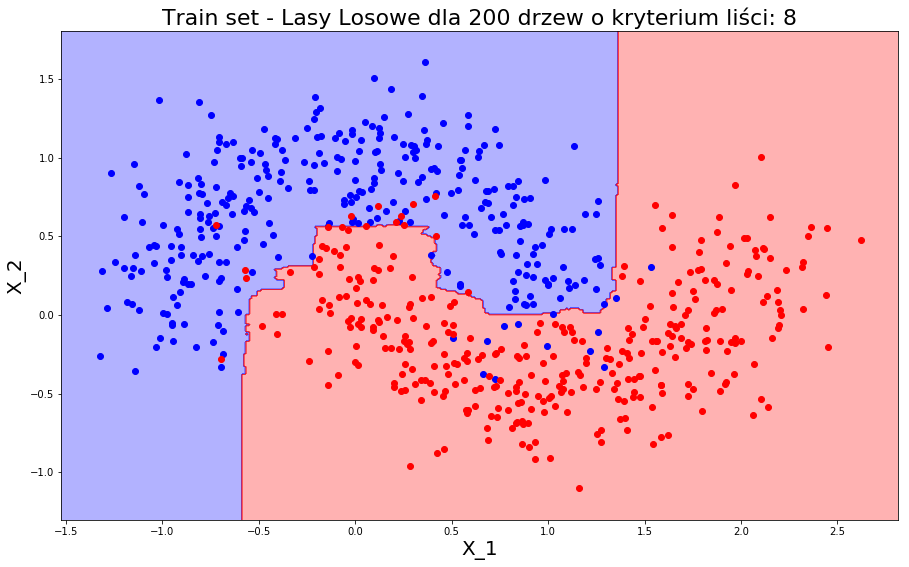

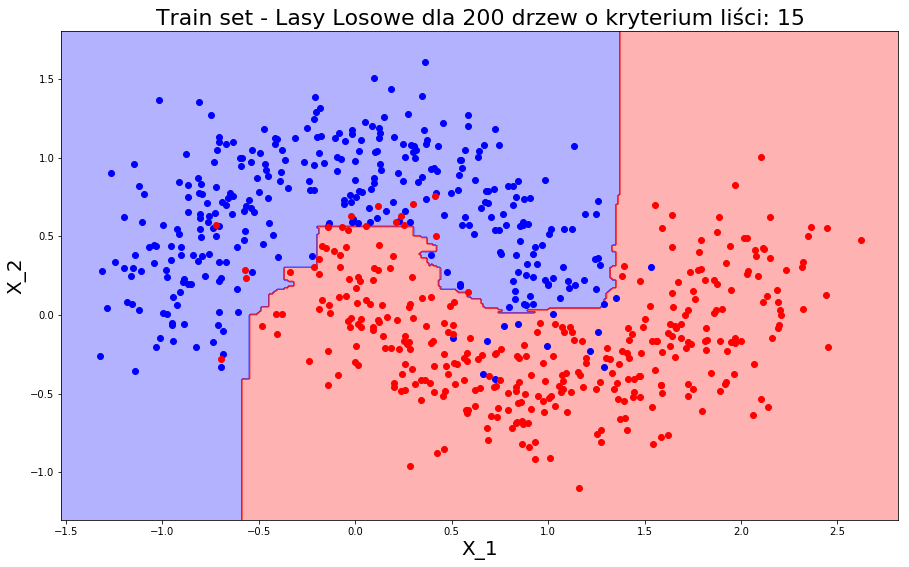

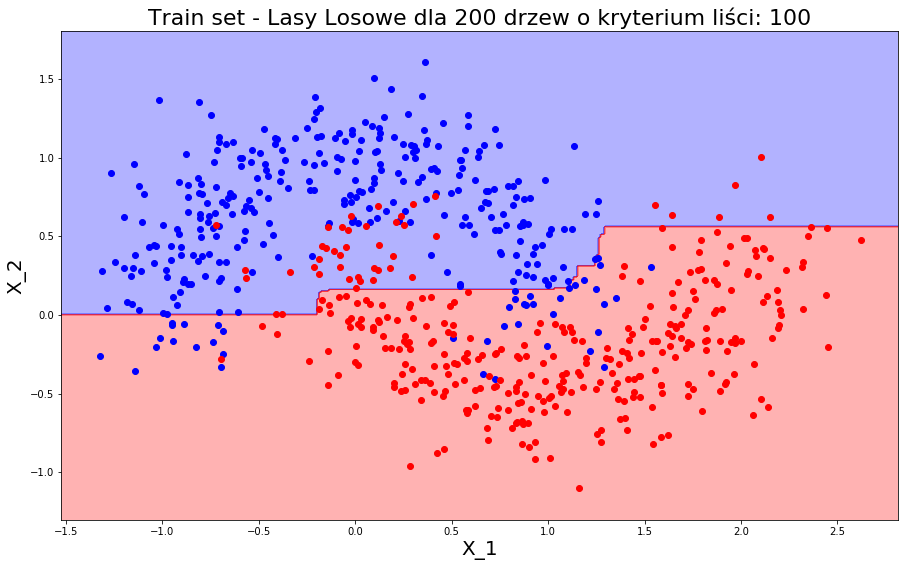

In [58]:
for l in [1, 2, 3, 5, 8, 15, 100]:
    clf_rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0, min_samples_leaf=l)
    clf_rf.fit(X_train, y_train)
    hlp.plot_classification(X=X_train, y=y_train, clf=clf_rf, title='Train set - Lasy Losowe dla 200 drzew o kryterium liści: {}'.format(l))

## Naiwny Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
clf_nb = GaussianNB()

In [118]:
X_train

array([[ 0.34762729,  0.10615985],
       [ 0.00936197,  0.0746606 ],
       [ 0.25306266, -0.1673247 ],
       ...,
       [-0.90648072,  0.4344182 ],
       [ 1.18359782,  0.22383477],
       [ 1.94619678,  0.1584434 ]])

In [121]:
clf_nb.fit(X_train, y_train)

GaussianNB(priors=None)

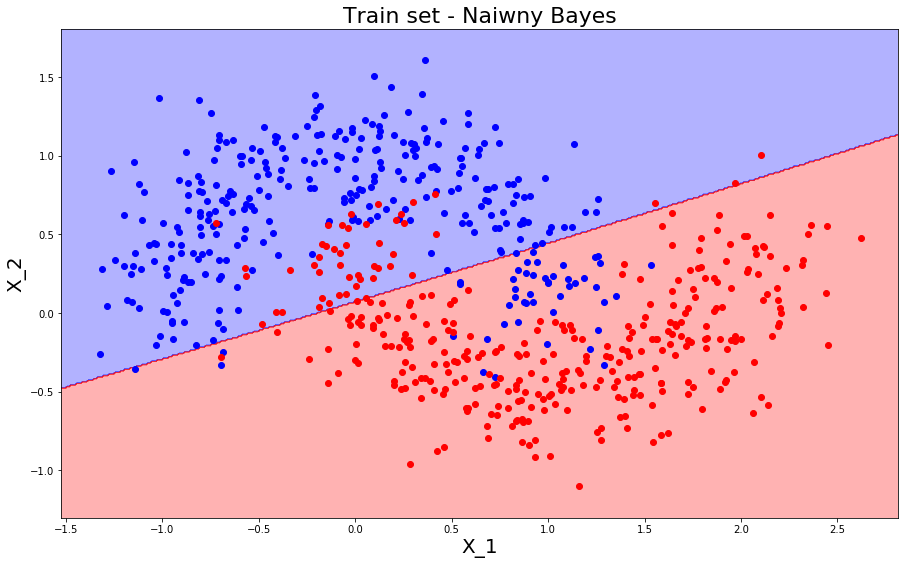

In [122]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_nb, title='Train set - Naiwny Bayes')

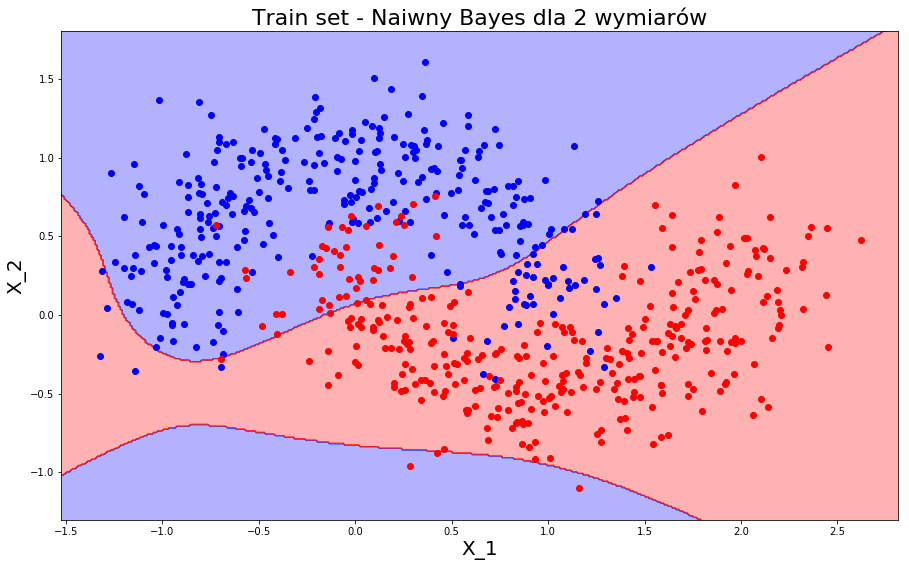

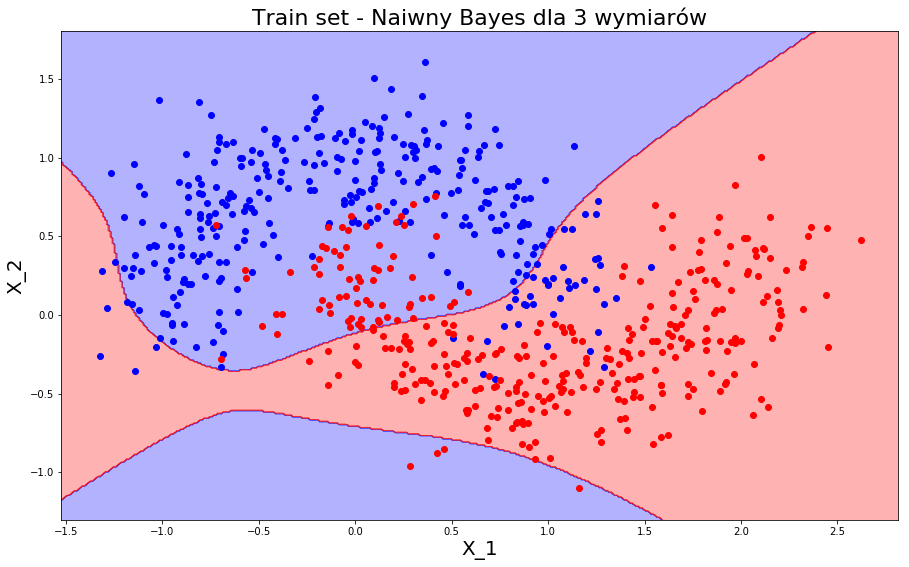

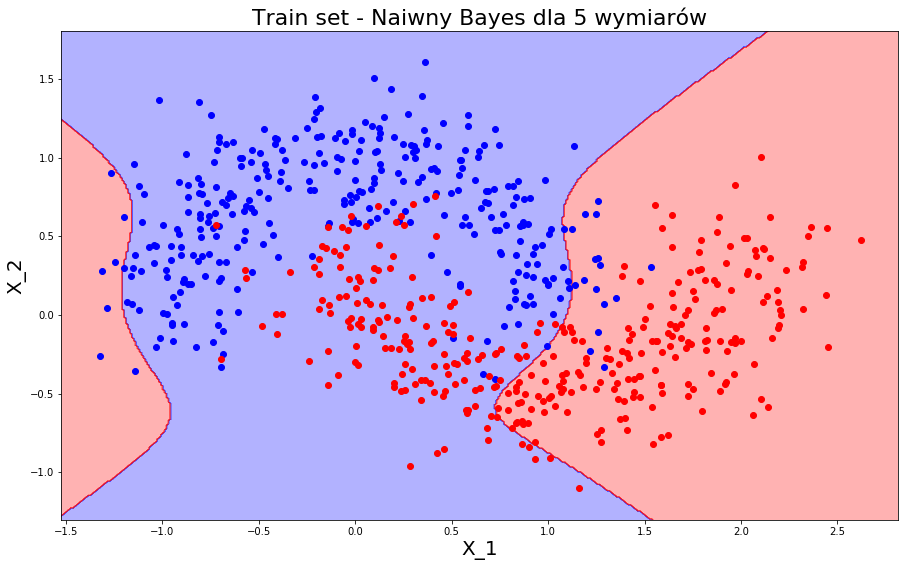

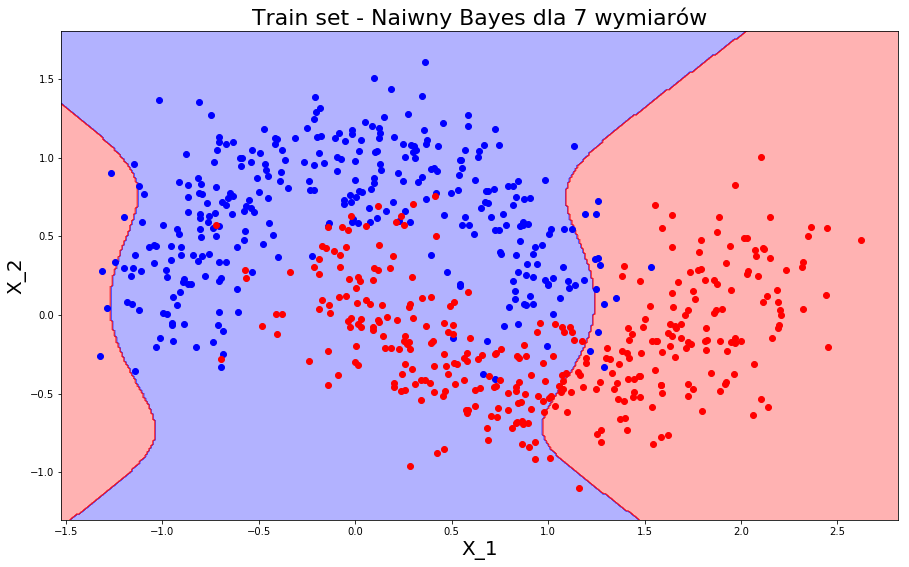

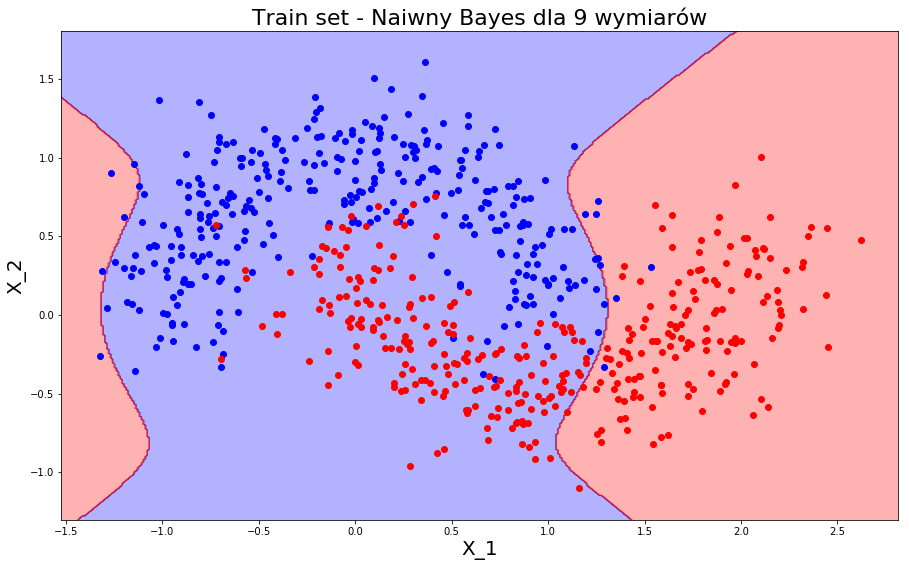

In [126]:
for n in [2, 3, 5, 7, 9]:
    poly_nb = PolynomialFeatures(degree = n)
    X_nb = poly_nb.fit_transform(X_train)
    clf_nb = GaussianNB()
    clf_nb.fit(X_nb, y_train)
    hlp.plot_classification_poly(X_poly=X_nb, y=y_train, clf_poly=clf_nb, poly=poly_nb, title='Train set - Naiwny Bayes dla {} wymiarów'.format(n))

In [64]:
import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense

Using TensorFlow backend.


In [65]:
clf_nn = Sequential()
clf_nn.add(Dense(6,  kernel_initializer = 'he_normal', activation="tanh", input_dim=2))
clf_nn.add(Dense(6,  kernel_initializer = 'he_normal', activation="tanh"))
clf_nn.add(Dense(6,  kernel_initializer = 'he_normal',  activation="tanh"))
clf_nn.add(Dense(6,  kernel_initializer = 'he_normal',  activation="tanh"))
clf_nn.add(Dense(1, activation="sigmoid"))

Dostępne inicjalizatory:
* uniform
* lecun_uniform: Uniform initialization scaled by the square root of the number of inputs (LeCun 98).
* normal
* zero
* one
* glorot_normal: Gaussian initialization scaled by fan_in + fan_out (Glorot 2010)
* glorot_uniform
* he_normal: Gaussian initialization scaled by fan_in (He et al., 2014)
* he_uniform

In [66]:
clf_nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [67]:
history = clf_nn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=300)

Train on 670 samples, validate on 330 samples
Epoch 1/300
670/670 [==============================] - 0s 450us/step - loss: 0.8925 - acc: 0.1910 - val_loss: 0.8230 - val_acc: 0.2121
Epoch 2/300
670/670 [==============================] - 0s 25us/step - loss: 0.7566 - acc: 0.3418 - val_loss: 0.6934 - val_acc: 0.6030
Epoch 3/300
670/670 [==============================] - 0s 25us/step - loss: 0.6300 - acc: 0.7582 - val_loss: 0.5909 - val_acc: 0.7909
Epoch 4/300
670/670 [==============================] - 0s 25us/step - loss: 0.5441 - acc: 0.8075 - val_loss: 0.5268 - val_acc: 0.8000
Epoch 5/300
670/670 [==============================] - 0s 25us/step - loss: 0.4957 - acc: 0.8164 - val_loss: 0.4882 - val_acc: 0.8121
Epoch 6/300
670/670 [==============================] - 0s 25us/step - loss: 0.4669 - acc: 0.8209 - val_loss: 0.4610 - val_acc: 0.8182
Epoch 7/300
670/670 [==============================] - 0s 25us/step - loss: 0.4469 - acc: 0.8299 - val_loss: 0.4409 - val_acc: 0.8303
Epoch 8/300
670

670/670 [==============================] - 0s 52us/step - loss: 0.1348 - acc: 0.9493 - val_loss: 0.1397 - val_acc: 0.9545
Epoch 122/300
670/670 [==============================] - 0s 46us/step - loss: 0.1338 - acc: 0.9478 - val_loss: 0.1362 - val_acc: 0.9485
Epoch 123/300
670/670 [==============================] - 0s 37us/step - loss: 0.1334 - acc: 0.9507 - val_loss: 0.1388 - val_acc: 0.9515
Epoch 124/300
670/670 [==============================] - 0s 40us/step - loss: 0.1336 - acc: 0.9478 - val_loss: 0.1420 - val_acc: 0.9515
Epoch 125/300
670/670 [==============================] - 0s 39us/step - loss: 0.1319 - acc: 0.9478 - val_loss: 0.1389 - val_acc: 0.9455
Epoch 126/300
670/670 [==============================] - 0s 37us/step - loss: 0.1322 - acc: 0.9478 - val_loss: 0.1391 - val_acc: 0.9545
Epoch 127/300
670/670 [==============================] - 0s 47us/step - loss: 0.1316 - acc: 0.9507 - val_loss: 0.1368 - val_acc: 0.9515
Epoch 128/300
670/670 [==============================] - 0s 49

670/670 [==============================] - 0s 36us/step - loss: 0.1291 - acc: 0.9507 - val_loss: 0.1394 - val_acc: 0.9545
Epoch 242/300
670/670 [==============================] - 0s 37us/step - loss: 0.1278 - acc: 0.9507 - val_loss: 0.1399 - val_acc: 0.9485
Epoch 243/300
670/670 [==============================] - 0s 37us/step - loss: 0.1268 - acc: 0.9493 - val_loss: 0.1421 - val_acc: 0.9576
Epoch 244/300
670/670 [==============================] - 0s 36us/step - loss: 0.1271 - acc: 0.9448 - val_loss: 0.1358 - val_acc: 0.9485
Epoch 245/300
670/670 [==============================] - 0s 36us/step - loss: 0.1288 - acc: 0.9507 - val_loss: 0.1406 - val_acc: 0.9545
Epoch 246/300
670/670 [==============================] - 0s 36us/step - loss: 0.1285 - acc: 0.9478 - val_loss: 0.1404 - val_acc: 0.9515
Epoch 247/300
670/670 [==============================] - 0s 35us/step - loss: 0.1279 - acc: 0.9433 - val_loss: 0.1382 - val_acc: 0.9515
Epoch 248/300
670/670 [==============================] - 0s 38

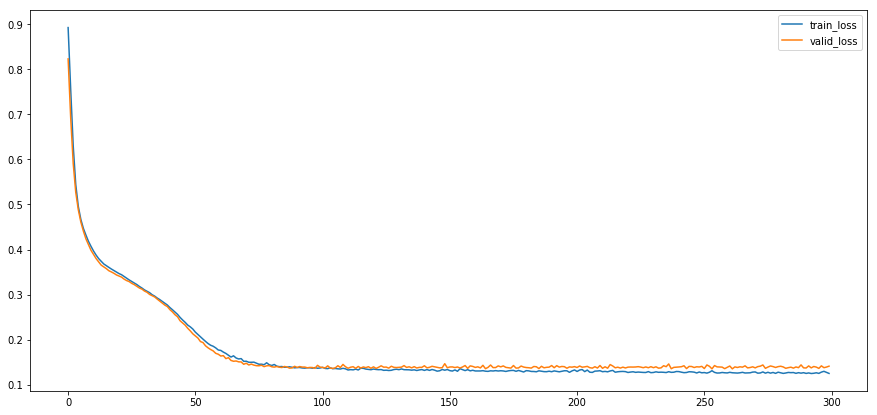

In [68]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='valid_loss')
plt.legend()

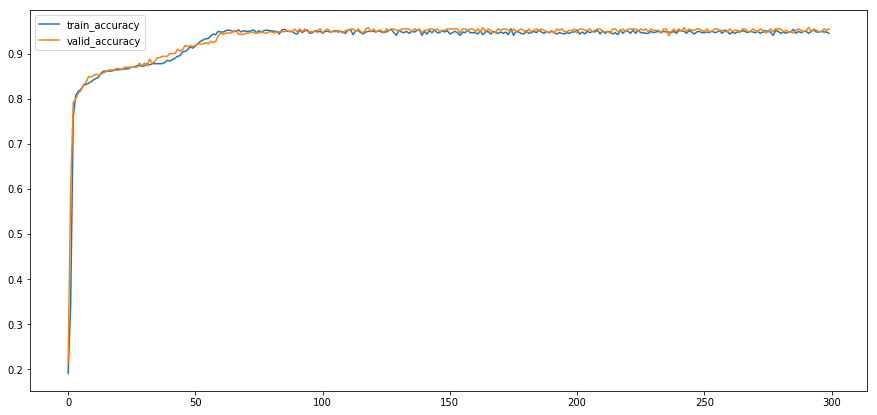

In [69]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['acc'], label='train_accuracy')
plt.plot(history.history['val_acc'], label='valid_accuracy')
plt.legend()

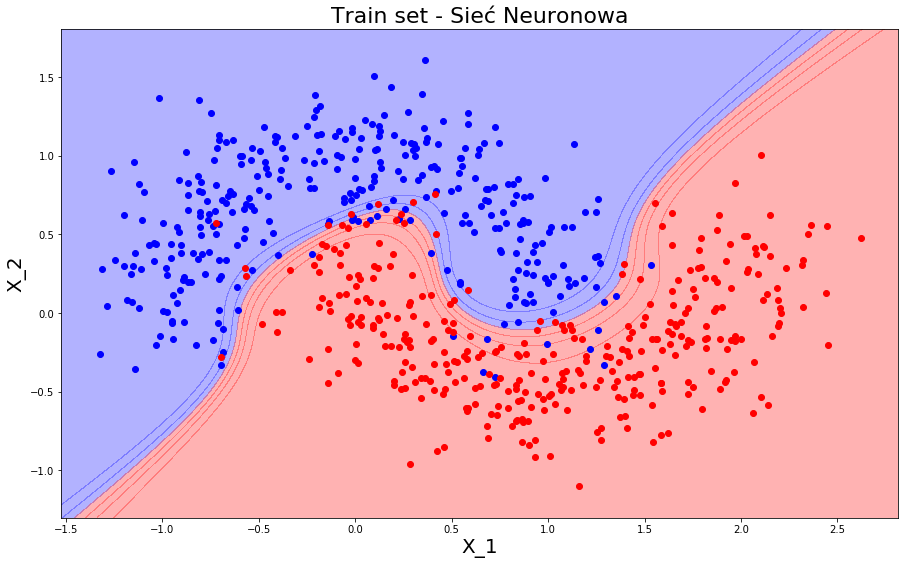

In [70]:
hlp.plot_classification(X=X_train, y=y_train, clf=clf_nn, title='Train set - Sieć Neuronowa')

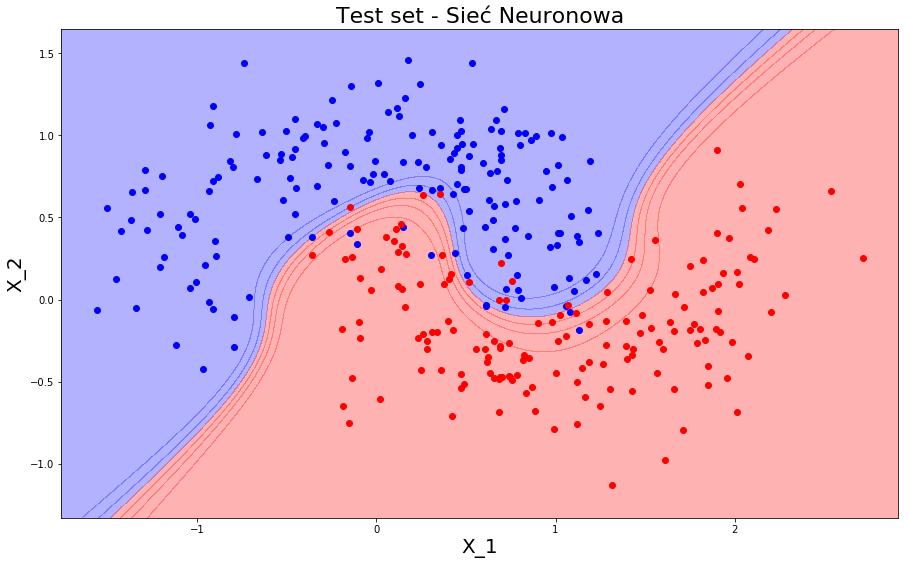

In [71]:
hlp.plot_classification(X=X_test, y=y_test, clf=clf_nn, title='Test set - Sieć Neuronowa')

In [72]:
clf_nn.predict(X_test)

array([[9.87182140e-01],
       [6.08840957e-02],
       [9.75318968e-01],
       [4.85555083e-03],
       [9.92282093e-01],
       [9.96310174e-01],
       [2.05904931e-01],
       [1.79504320e-01],
       [9.93959188e-01],
       [1.71546824e-02],
       [1.13802133e-02],
       [9.82199013e-01],
       [2.12319139e-02],
       [9.94447708e-01],
       [7.70310115e-04],
       [9.81414497e-01],
       [9.97696221e-01],
       [9.55860037e-03],
       [9.77693796e-01],
       [4.93695214e-03],
       [6.91398000e-03],
       [5.03233932e-02],
       [9.72649992e-01],
       [7.08695850e-04],
       [8.16914737e-02],
       [1.00923412e-01],
       [3.13221514e-02],
       [6.83482504e-03],
       [4.60594380e-03],
       [9.05236244e-01],
       [9.97967064e-01],
       [2.19147149e-02],
       [4.24869150e-01],
       [9.92248058e-01],
       [8.83631874e-03],
       [9.97703373e-01],
       [8.29179406e-01],
       [8.20481181e-01],
       [9.95514691e-01],
       [9.75582182e-01],


In [73]:
y_pred_proba = clf_nn.predict(X_test)

In [74]:
y_pred_bin = (y_pred_proba >= 0.5).astype(int)

In [75]:
y_pred_bin

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

## Ocena modeli dla KNN

In [76]:
y_pred_bin = clf_rf.predict(X_test)

In [77]:
y_pred_bin

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [78]:
y_pred_bin.shape

(330,)

In [79]:
y_pred_proba = clf_knn.predict_proba(X_test)

In [80]:
y_pred_proba

array([[0.07070707, 0.92929293],
       [0.64646465, 0.35353535],
       [0.06060606, 0.93939394],
       [0.93939394, 0.06060606],
       [0.03030303, 0.96969697],
       [0.        , 1.        ],
       [0.49494949, 0.50505051],
       [0.50505051, 0.49494949],
       [0.02020202, 0.97979798],
       [0.84848485, 0.15151515],
       [0.81818182, 0.18181818],
       [0.06060606, 0.93939394],
       [0.75757576, 0.24242424],
       [0.02020202, 0.97979798],
       [0.95959596, 0.04040404],
       [0.09090909, 0.90909091],
       [0.06060606, 0.93939394],
       [0.92929293, 0.07070707],
       [0.07070707, 0.92929293],
       [0.94949495, 0.05050505],
       [0.93939394, 0.06060606],
       [0.6969697 , 0.3030303 ],
       [0.07070707, 0.92929293],
       [0.96969697, 0.03030303],
       [0.78787879, 0.21212121],
       [0.45454545, 0.54545455],
       [0.76767677, 0.23232323],
       [0.90909091, 0.09090909],
       [0.94949495, 0.05050505],
       [0.16161616, 0.83838384],
       [0.

In [81]:
y_pred_proba.shape

(330, 2)

In [82]:
y_pred_positive = y_pred_proba[:, 1:]

In [83]:
y_pred_positive

array([[0.92929293],
       [0.35353535],
       [0.93939394],
       [0.06060606],
       [0.96969697],
       [1.        ],
       [0.50505051],
       [0.49494949],
       [0.97979798],
       [0.15151515],
       [0.18181818],
       [0.93939394],
       [0.24242424],
       [0.97979798],
       [0.04040404],
       [0.90909091],
       [0.93939394],
       [0.07070707],
       [0.92929293],
       [0.05050505],
       [0.06060606],
       [0.3030303 ],
       [0.92929293],
       [0.03030303],
       [0.21212121],
       [0.54545455],
       [0.23232323],
       [0.09090909],
       [0.05050505],
       [0.83838384],
       [0.80808081],
       [0.13131313],
       [0.51515152],
       [0.98989899],
       [0.06060606],
       [0.93939394],
       [0.64646465],
       [0.73737374],
       [0.98989899],
       [0.93939394],
       [0.87878788],
       [0.90909091],
       [0.93939394],
       [0.03030303],
       [0.24242424],
       [0.88888889],
       [0.01010101],
       [0.060

## Macierz pomyłek

In [84]:
from sklearn import metrics

In [85]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_bin)

In [86]:
cm

array([[150,  24],
       [ 21, 135]])

In [87]:
tn, fp, fn, tp = cm.ravel()

In [88]:
tn, fp, fn, tp

(150, 24, 21, 135)

In [89]:
print('Dokładność: {0:.3f}'.format(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_bin)))

Dokładność: 0.864


In [90]:
print('Precyzja: {0:.3f}'.format(metrics.precision_score(y_true=y_test, y_pred=y_pred_bin)))

Precyzja: 0.849


In [91]:
print('Czułość: {0:.3f}'.format(metrics.recall_score(y_true=y_test, y_pred=y_pred_bin)))

Czułość: 0.865


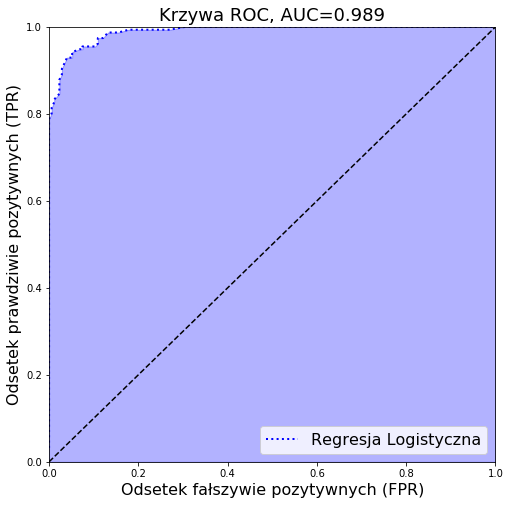

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_positive)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Regresja Logistyczna")
plt.fill_between(fpr, tpr, color='blue', alpha=0.3)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)', fontsize=16)
plt.ylabel('Odsetek prawdziwie pozytywnych (TPR)', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.title('Krzywa ROC, AUC={0:.3f}'.format(metrics.roc_auc_score(y_test, y_pred_positive)), fontsize=18)
plt.show()

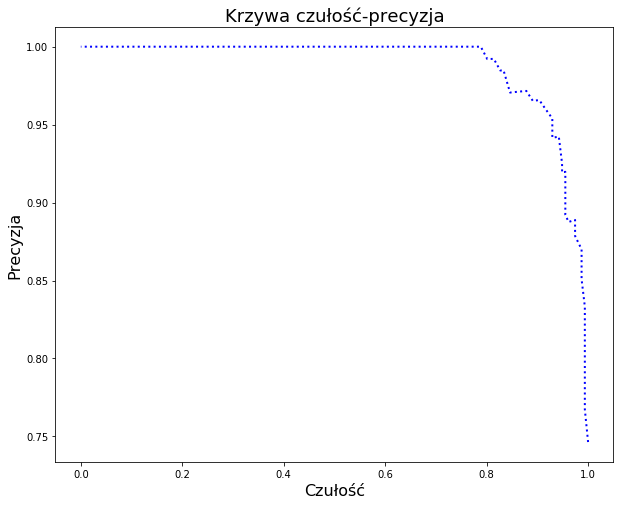

In [93]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_positive)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, "b:", linewidth=2, label="Regresja Logistyczna")
plt.xlabel('Czułość', fontsize=16)
plt.ylabel('Precyzja', fontsize=16)
plt.title('Krzywa czułość-precyzja', fontsize=18)
plt.show()

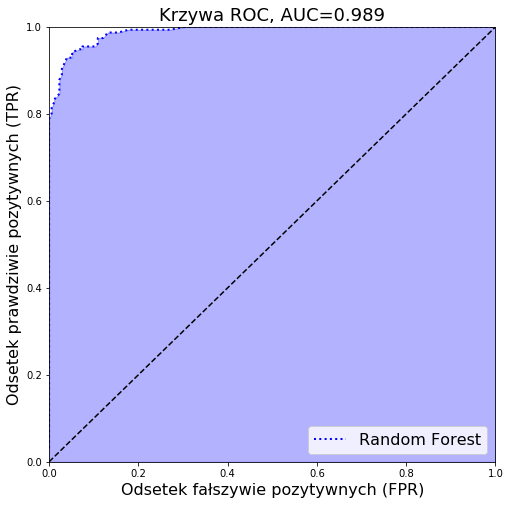

In [94]:
hlp.plot_roc_curve(y_pred_positive=y_pred_positive, y_test=y_test, label='Random Forest')

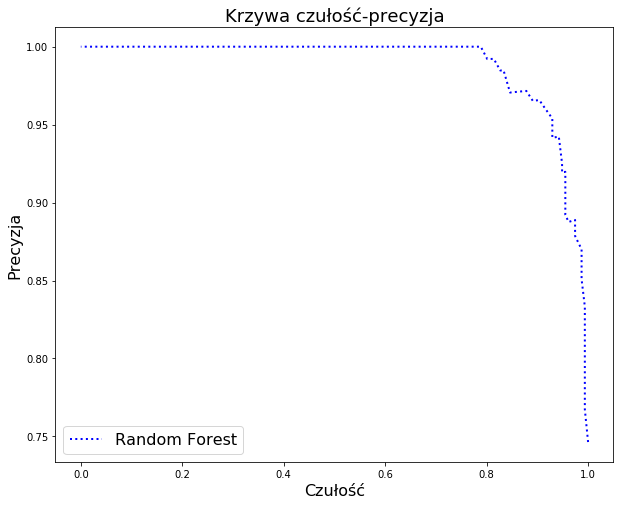

In [95]:
hlp.plot_prec_rec(y_pred_positive=y_pred_positive, y_test=y_test, label='Random Forest')

# Cross-walidacja

In [96]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state = 14)

In [97]:
acc_cv = list()
for train_index, test_index in kfold.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train, y_train)
    y_pred_bin = clf_knn.predict(X_test)
    acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_bin)
    acc_cv.append(acc)
    print('Accuracy: ', acc)

Accuracy:  0.94
Accuracy:  0.92
Accuracy:  0.91
Accuracy:  0.95
Accuracy:  0.95
Accuracy:  0.95
Accuracy:  0.97
Accuracy:  0.94
Accuracy:  0.95
Accuracy:  0.93


In [98]:
np.array(acc_cv).mean()

0.9409999999999998

In [99]:
np.array(acc_cv).std()

0.016401219466856697